# 엔트로피

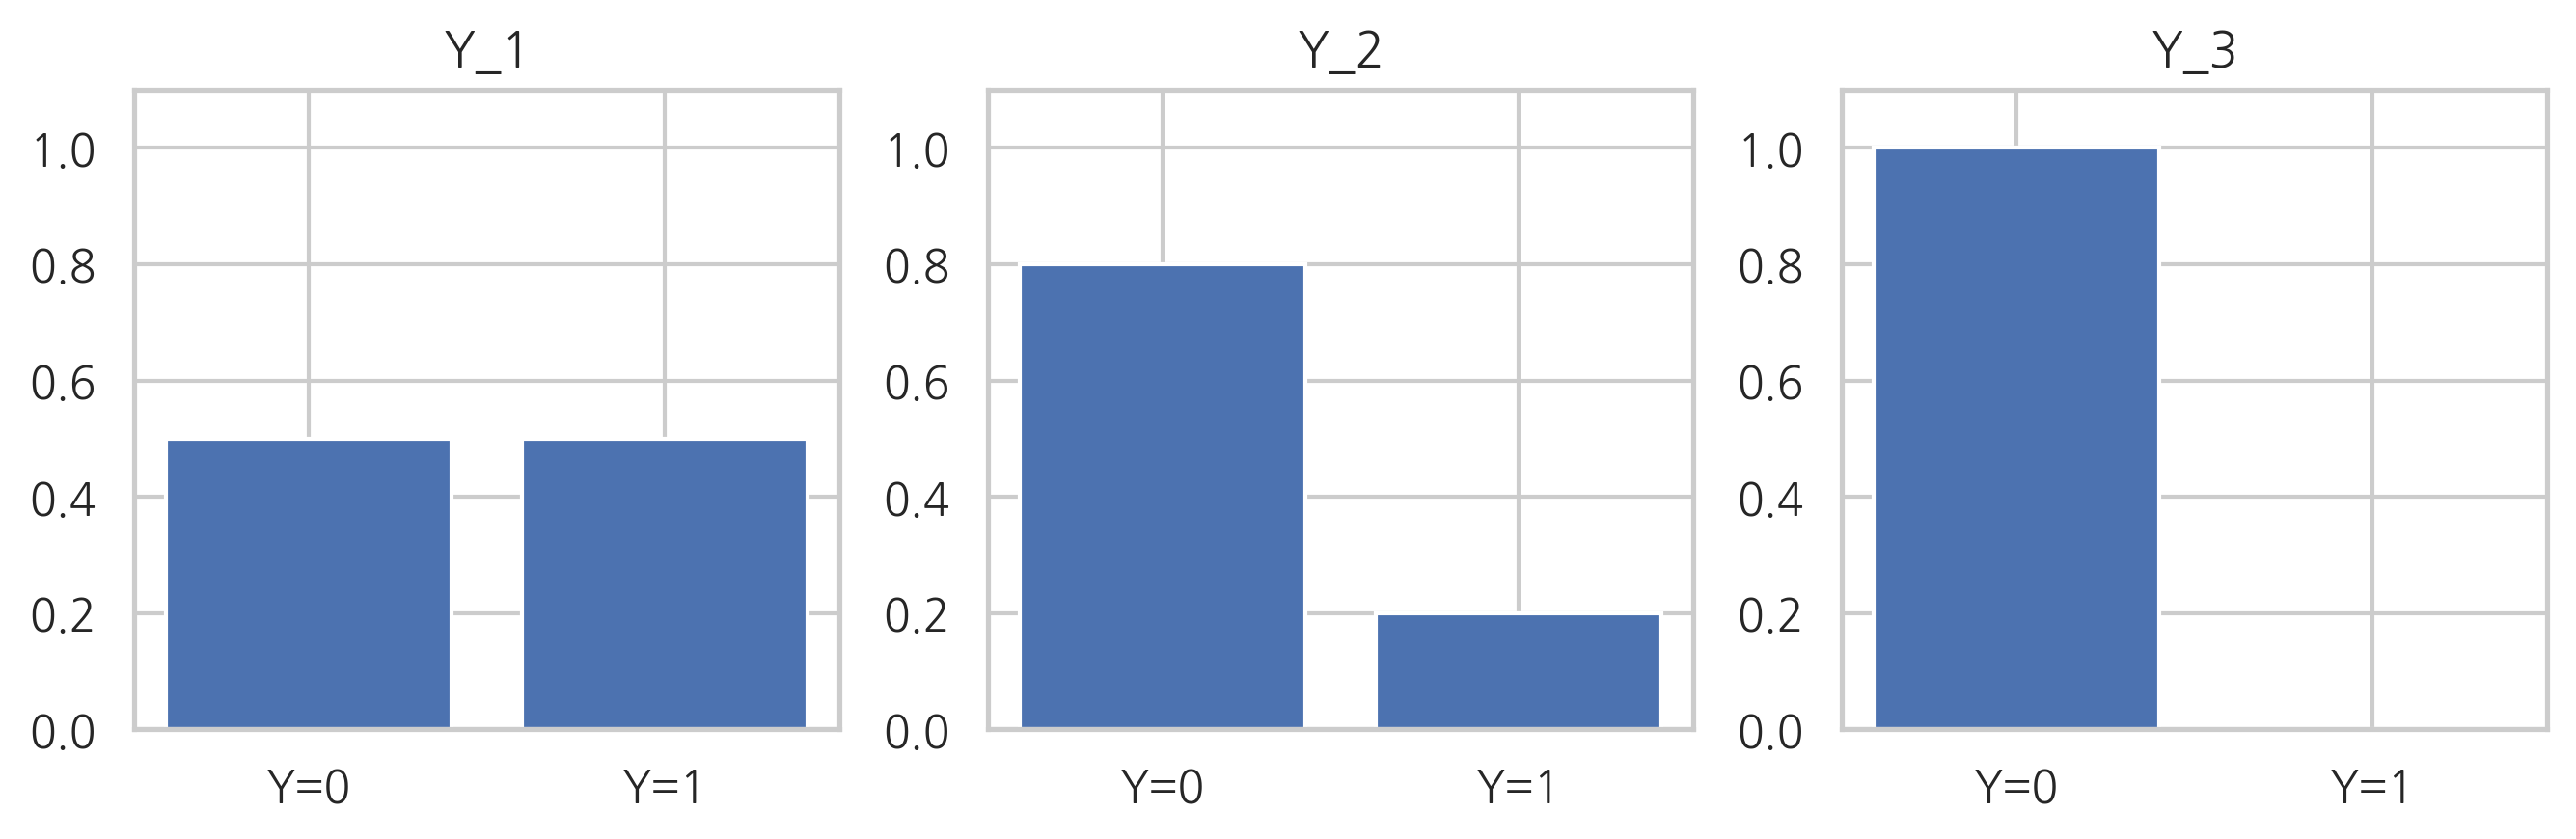

In [14]:
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.bar([0,1],[0.5,0.5])
plt.ylim(0, 1.1)
plt.title('Y_1')
plt.xticks([0,1], ['Y=0', 'Y=1'])

plt.subplot(132)
plt.bar([0,1], [0.8, 0.2])
plt.xticks([0,1], ['Y=0', 'Y=1'])
plt.ylim(0, 1.1)
plt.title('Y_2')

plt.subplot(133)
plt.bar([0,1], [1,0])
plt.xticks([0,1],['Y=0', 'Y=1'])
plt.ylim(0, 1.1)
plt.title('Y_3')

plt.tight_layout()
plt.show()

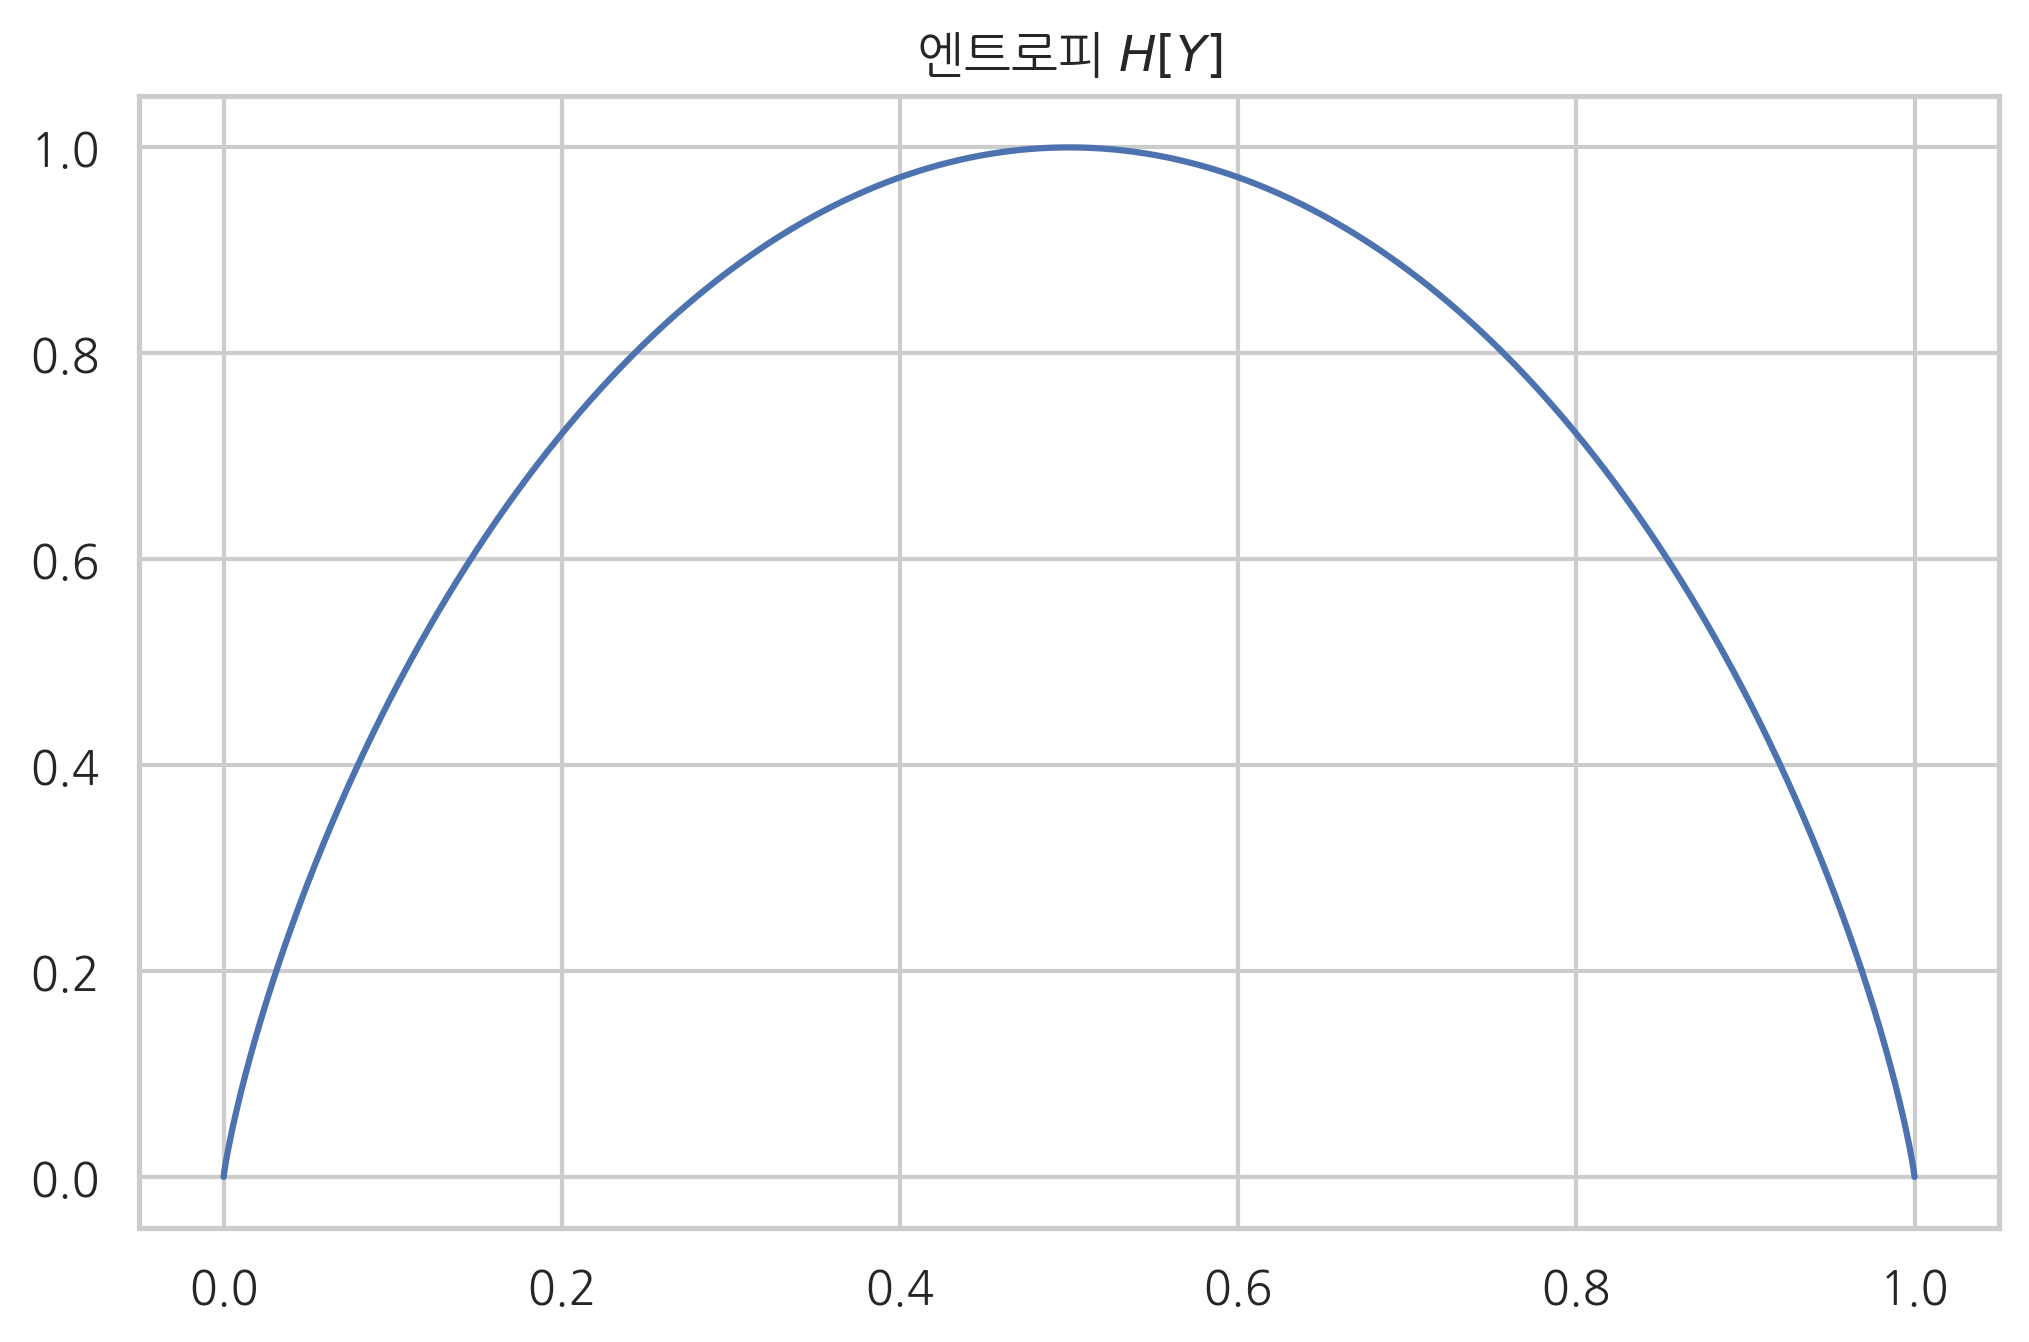

In [20]:
# 10.1.1 연습문제 

xx = np.linspace(0,1,10000)

ent_values = []
for p in xx : 
    if p == 0 or p == 1 : 
        ent_values.append(0)
    else : 
        ent_value = -(1-p)*np.log2(1-p)-p*np.log2(p)
        ent_values.append(ent_value)
plt.plot(xx, ent_values)
plt.title('엔트로피 $H[Y]$')
plt.show()

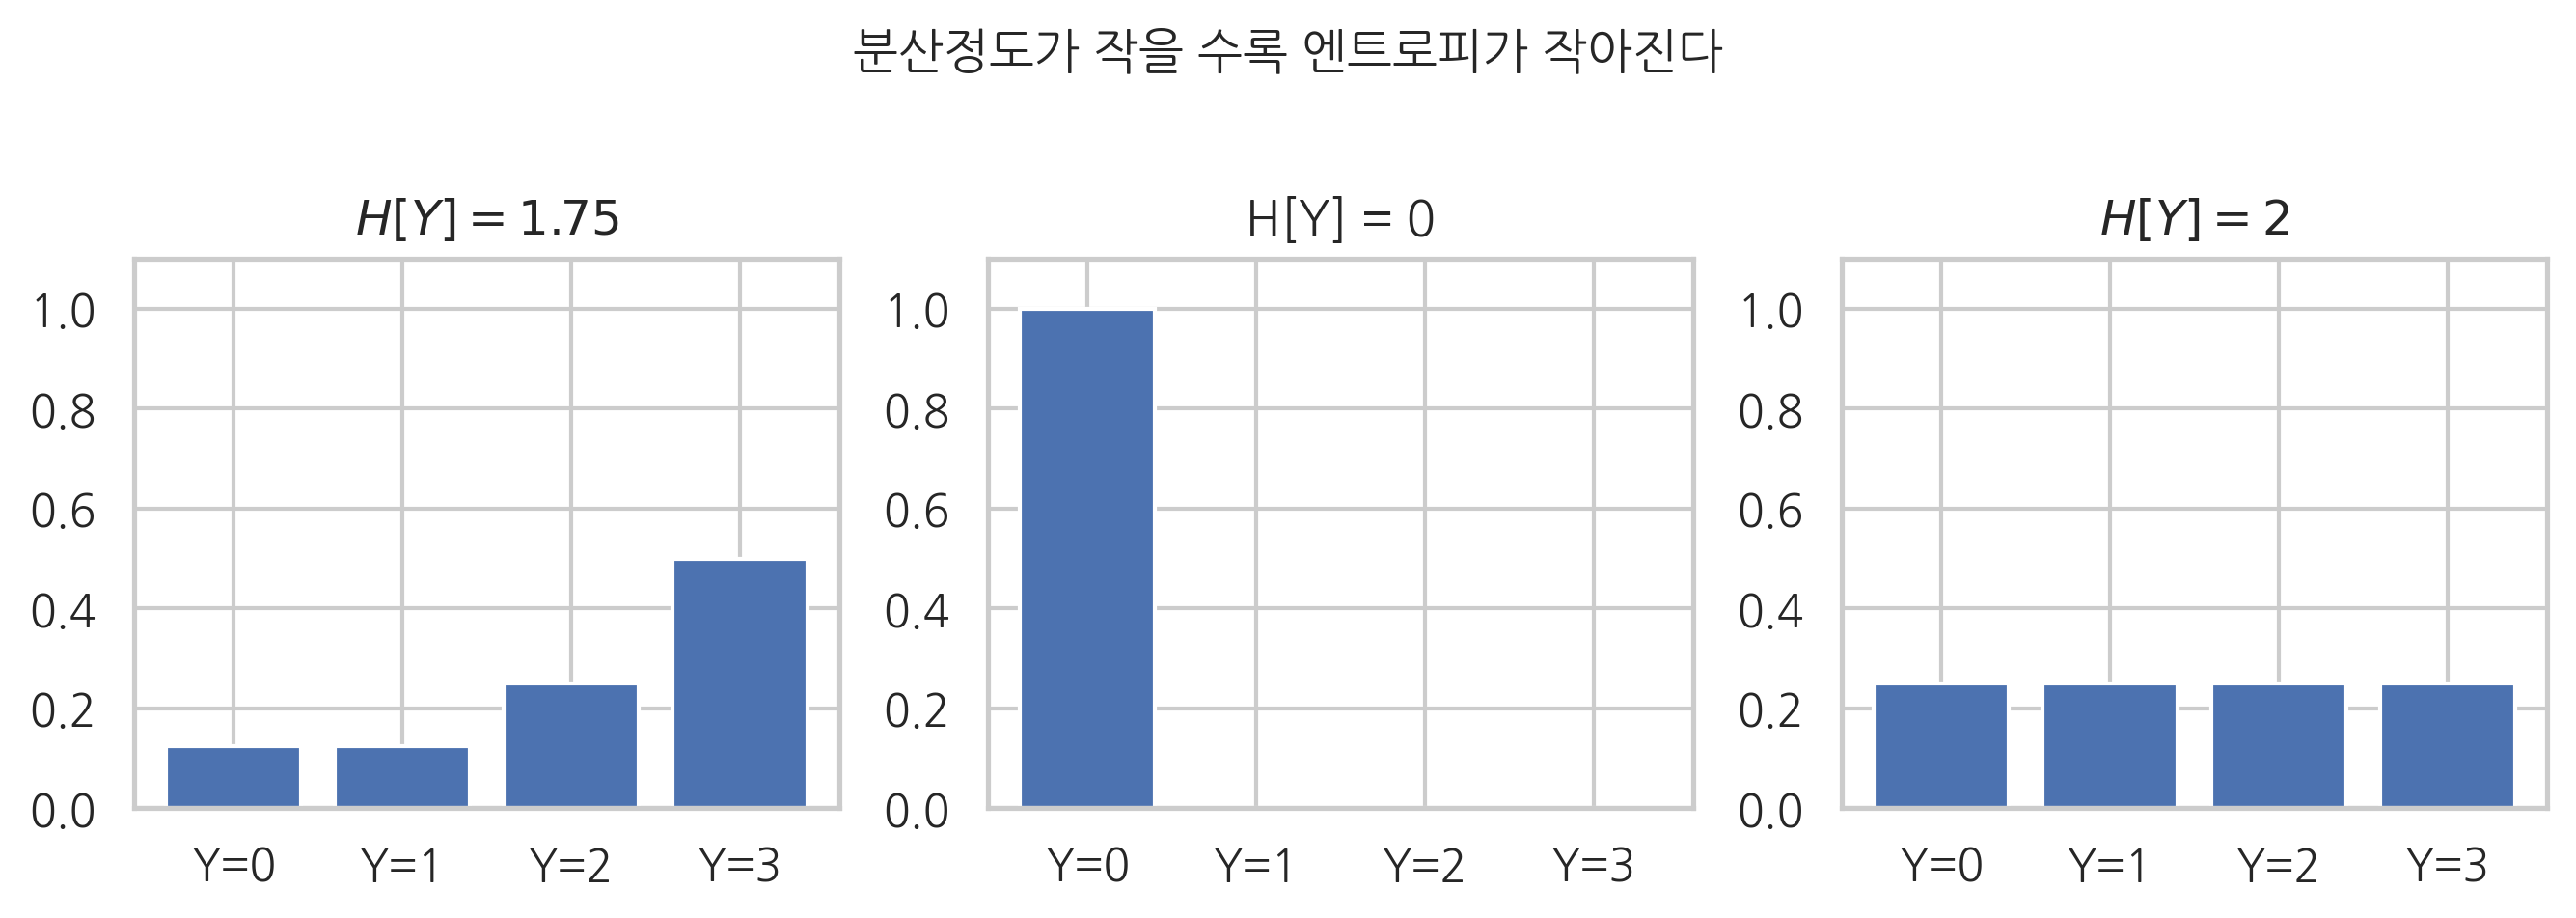

In [34]:
# 10.1.2 연습문제 
# 1. 
x1 = [1/8, 1/8, 1/4, 1/2]
x2 = [1,0,0,0]
x3 = [1/4]*4

plt.figure(figsize=(9,3))
plt.subplot(131)
plt.bar([0,1,2,3],x1)
plt.xticks([0,1,2,3], ['Y=0', 'Y=1', 'Y=2', 'Y=3'])
plt.title('$H[Y] = 1.75$')
plt.ylim(0,1.1)

plt.subplot(132)
plt.bar([0,1,2,3],x2)
plt.xticks([0,1,2,3], ['Y=0', 'Y=1', 'Y=2', 'Y=3'])
plt.title('H[Y] = 0')
plt.ylim(0,1.1)

plt.subplot(133)
plt.bar([0,1,2,3], x3)
plt.xticks([0,1,2,3], ['Y=0', 'Y=1', 'Y=2', 'Y=3'])
plt.title('$H[Y] = 2$')
plt.ylim(0,1.1)

plt.suptitle('분산정도가 작을 수록 엔트로피가 작아진다',y=1.04)
plt.tight_layout()
plt.show()

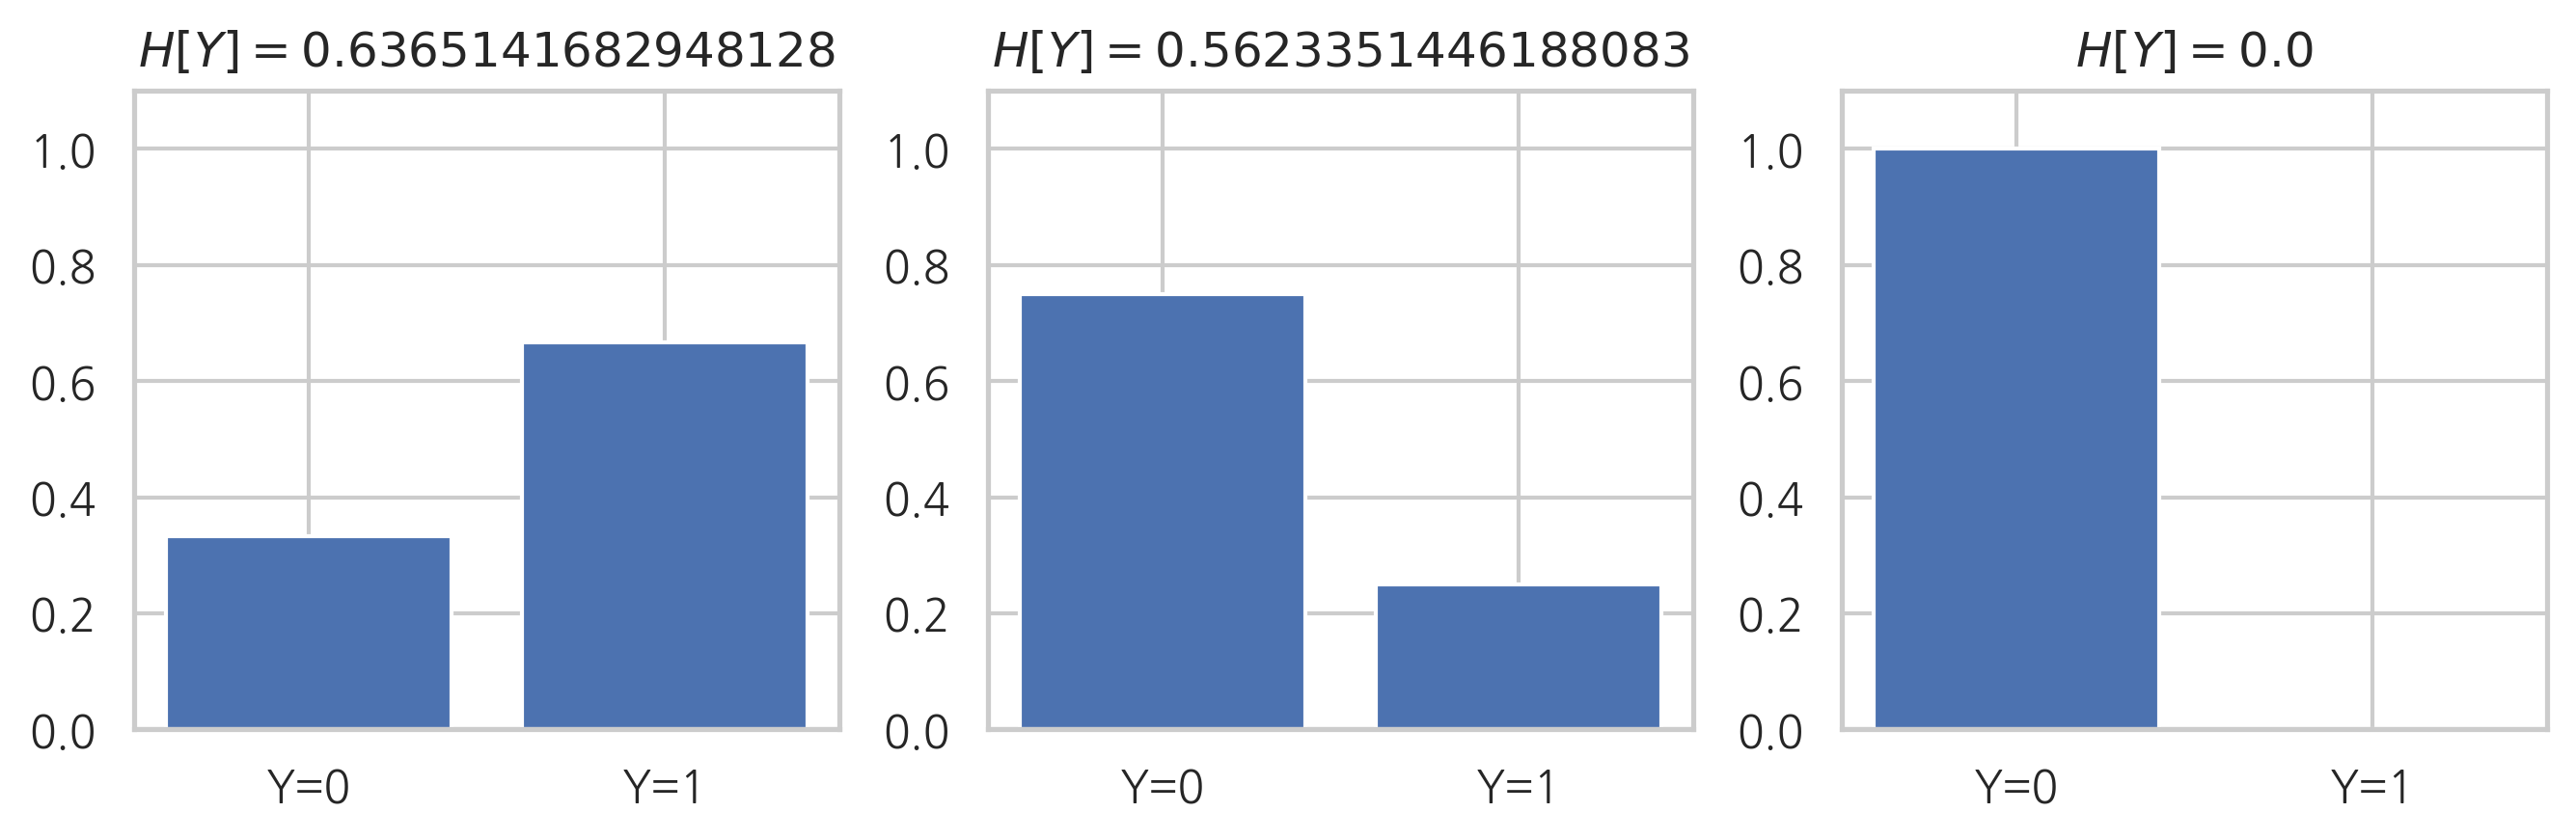

In [42]:
# 10.1.3 연습문제 

plt.figure(figsize=(9,3))
plt.subplot(131)
xx = [20/60, 40/60]
plt.bar([0,1], xx)
plt.ylim(0, 1.1)
plt.xticks([0,1],['Y=0', 'Y=1'])
ent1 = sp.stats.entropy(xx)
plt.title(f'$H[Y] = {ent1}$')

plt.subplot(132)
xx = [30/40, 10/40]
plt.bar([0,1], xx)
plt.ylim(0, 1.1)
plt.xticks([0,1], ['Y=0', 'Y=1'])
ent = sp.stats.entropy(xx)
plt.title(f'$H[Y] = {ent}$')

plt.subplot(133)
xx = [1, 0]
plt.bar([0,1], xx)
plt.ylim(0, 1.1)
plt.xticks([0,1], ['Y=0', 'Y=1'])
ent3 = sp.stats.entropy(xx)
plt.title(f'$H[Y] = {ent3}$')


plt.tight_layout()
plt.show()

# 가변길이 인코딩
 
: 결국 메시지도 글자수 분포 - 확률분포에서 일정 확률에 따라 표본 얻은것과 같았다



In [56]:
N = 200
p = [1/2, 1/4, 1/8, 1/8]
doc0 = list(''.join([int(N*p[i])*c for i, c in enumerate('ABCD')]))
np.random.shuffle(doc0)
doc = ''.join(doc0)
doc # 표본 200개

'AAAAABAAAACDAAAADABBBCCBBABBCABDABADADACBABACBADAABAACAADAABDCDCCABADCAACABABBAAAACDABBBDABCAAADDBBAABAAACAADADBCACBADBABAAABAAAABACABBBABAABCBABAAABACAACAACAAADABBBAAABDCDACDAAAADAAAABDAABABCDABBBDAA'

# 위 메시지는 아래 분포 200번 시뮬레이션해서 얻은 표본과도 같다.

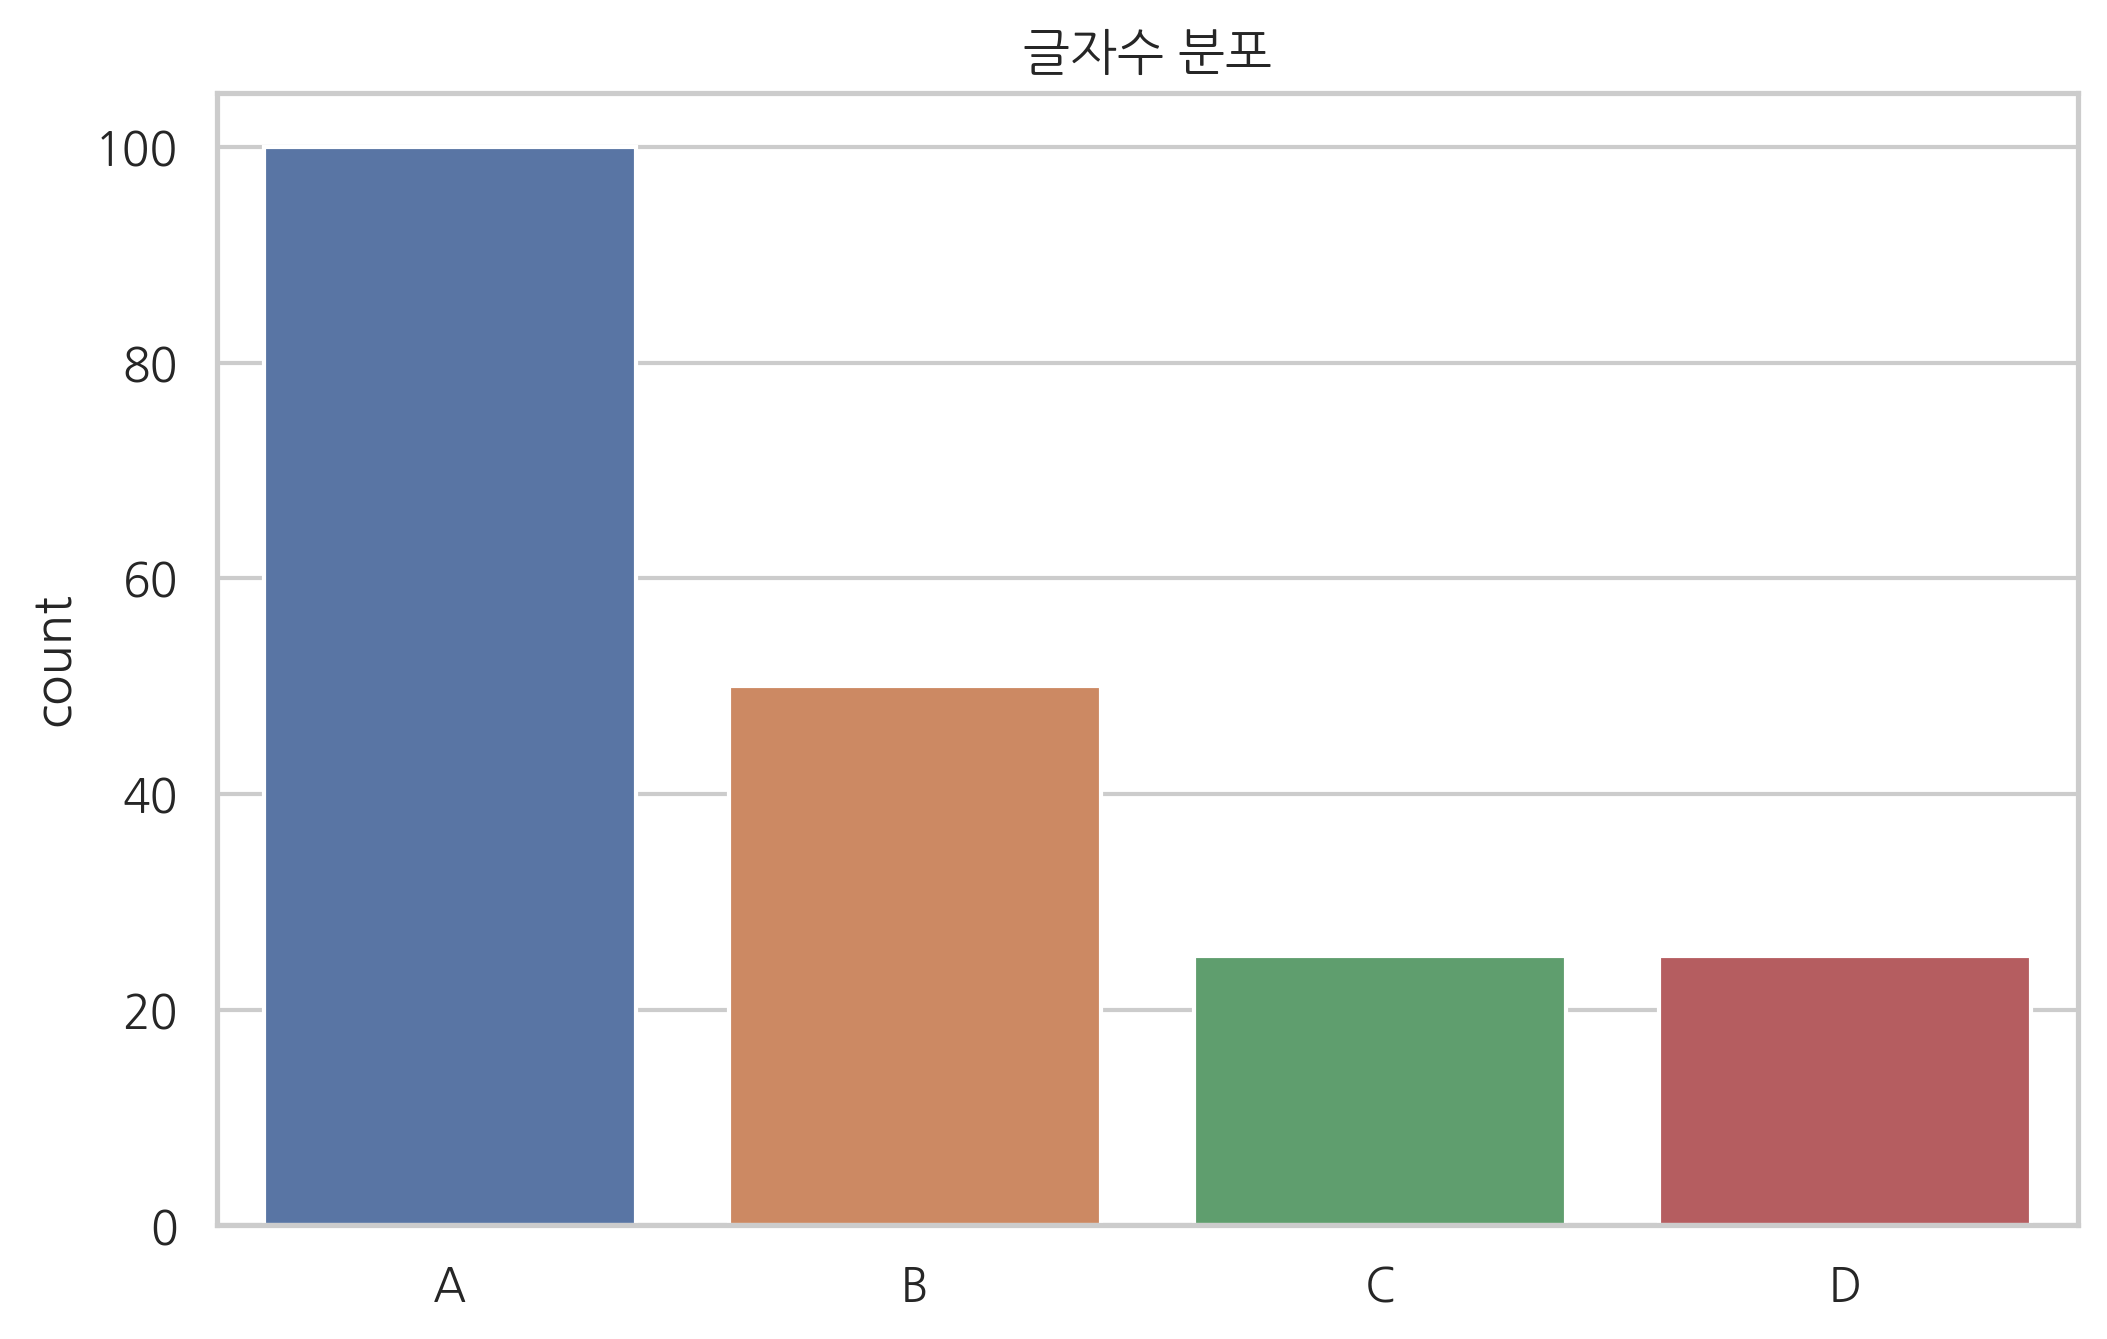

In [59]:
sns.countplot(list(doc), order='ABCD')
plt.title('글자수 분포')
plt.show()

# 가변길이 인코딩 해보자.

In [66]:
vl_encoder = {'A' : '0', 'B' : '10', 'C' : '110', 'D' : '111'}
vl_encoder_doc = ''.join([vl_encoder[c] for c in doc])
vl_encoder_doc

'00000100000110111000011101010101101101010010101100101110100111011101101001001101001110010001100011100101111101111101100100111110001100100101000001101110101010111010110000111111101000100001100011101111011001101001111001000010000010011001010100100010110100100001001100011000110000111010101000010111110111011011100001110000101110010010110111010101011100'

In [70]:
len(vl_encoder_doc)/len(doc) # 알파벳 1자 당 평균 비트수(정보량)

1.75

In [74]:
ent = sp.stats.entropy(p, base=2) # 글자수 확률분포 표본 1개당 평균정보량
print(ent)

1.75


In [83]:
mean_info = len(doc)*ent
mean_info2 = len(vl_encoder_doc)/len(doc)*len(doc)

print(f'데이터의 총 정보량 : {mean_info}')
print('내가 갖고 있는 표본데이터에 담긴 총 정보량')

데이터의 총 정보량 : 350.0
내가 갖고 있는 표본데이터에 담긴 총 정보량


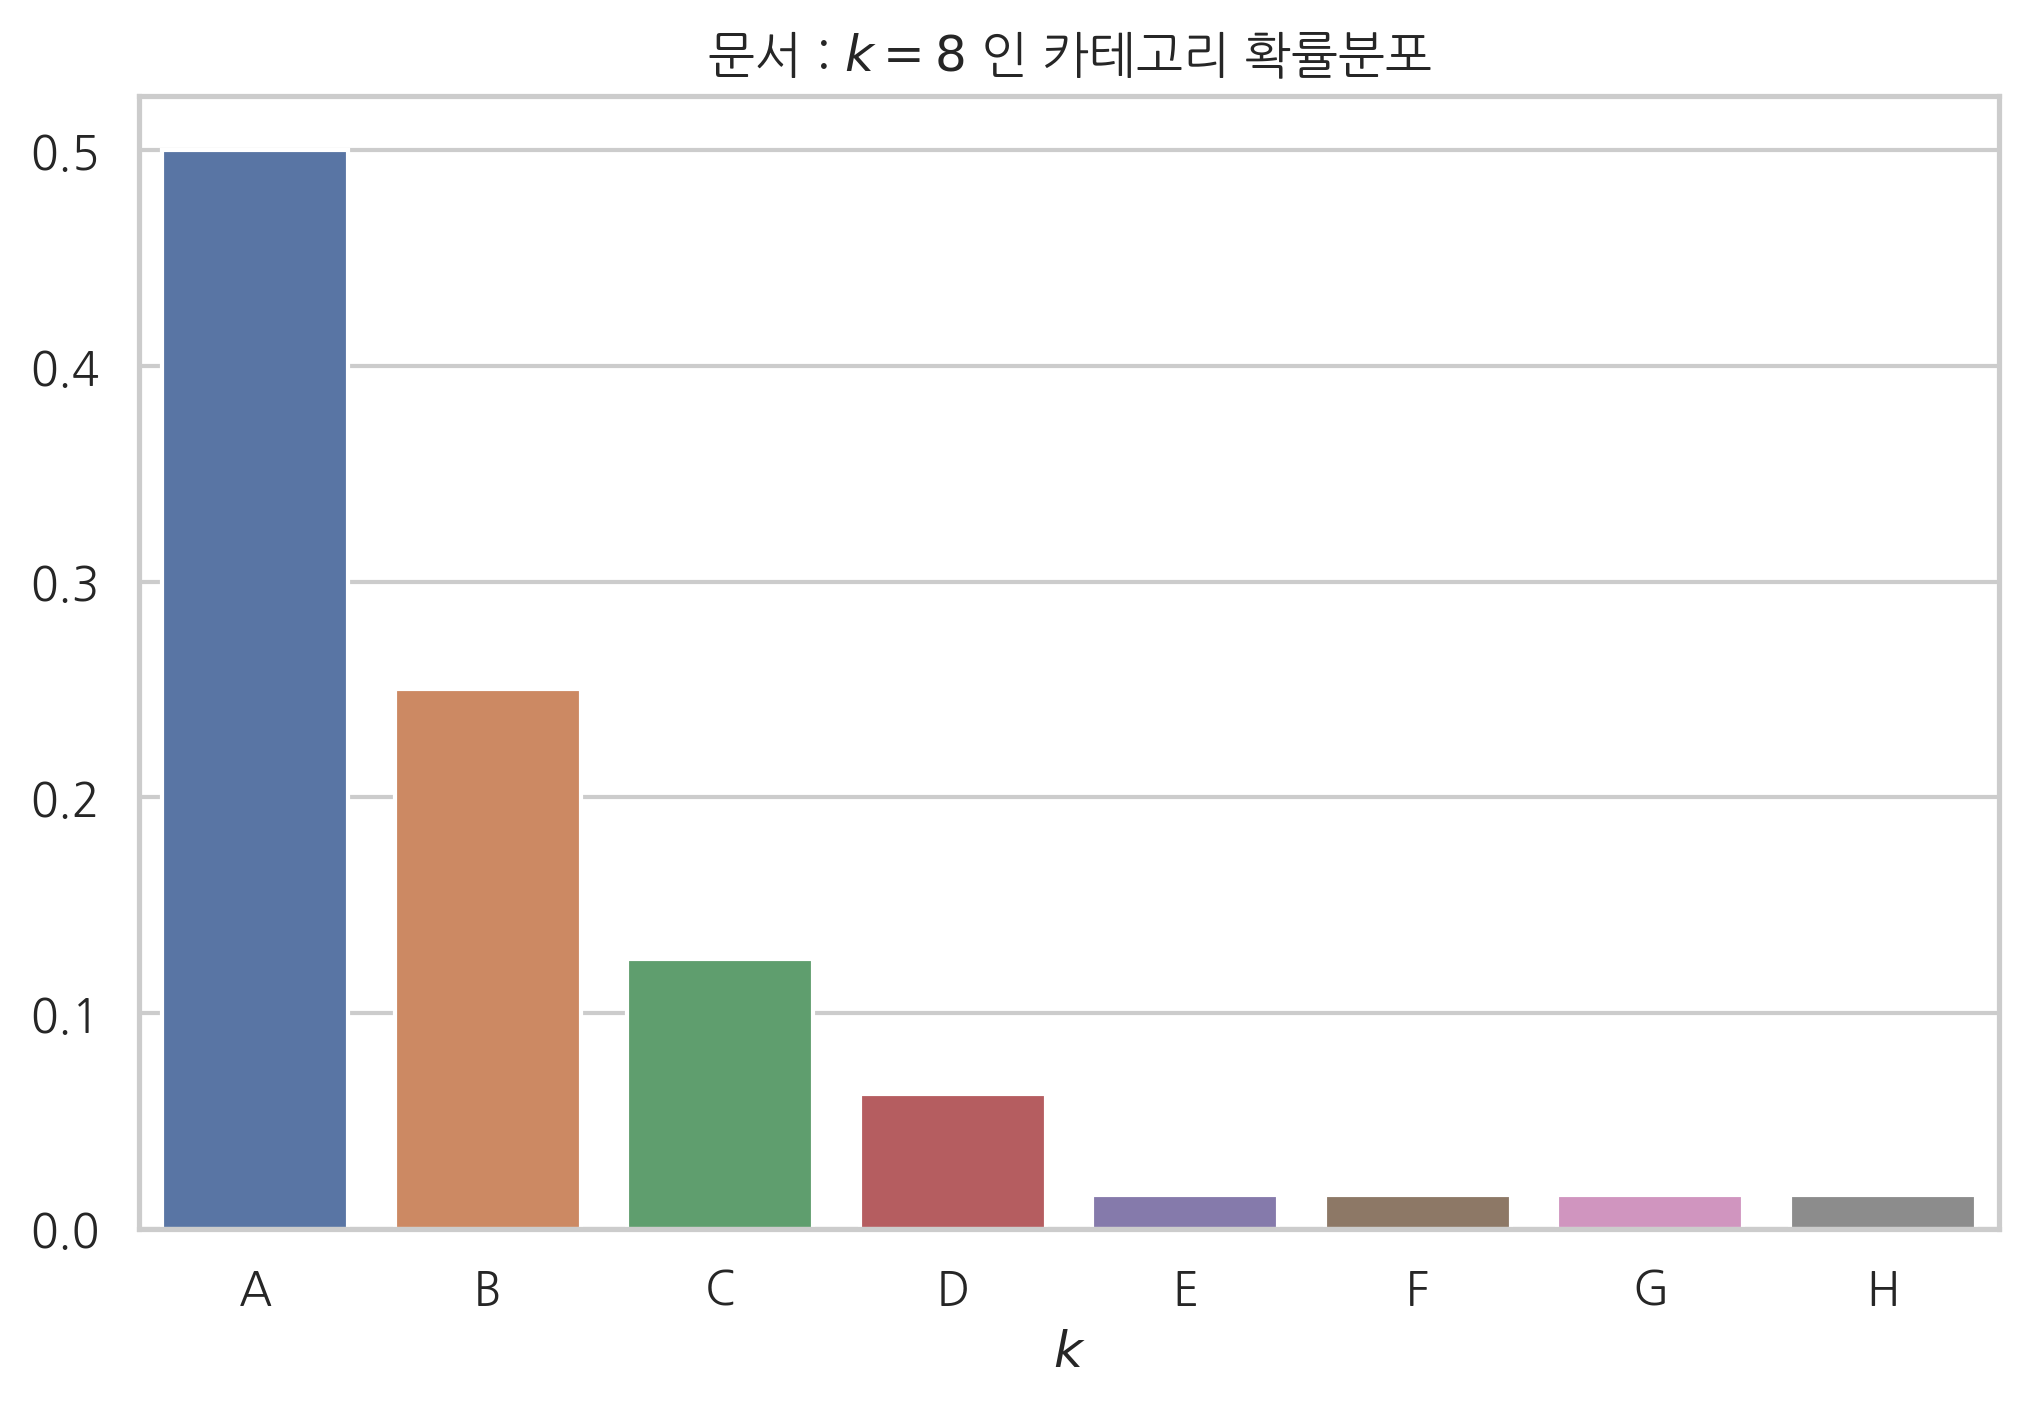

표본 1개 당 평균 정보량(=비트 수) : 2.0
k=8인 카테고리 확률분포의 엔트로피 : 2.0


In [105]:
# 10.1.4 연습문제 

p = [1/2, 1/4, 1/8, 1/16] + [1/64]*4

sns.barplot(np.arange(1,9), p)
plt.title('문서 : $k=8$ 인 카테고리 확률분포')
avg_info = sp.stats.entropy(p, base=2)
plt.xlabel('$k$')
plt.xticks(np.arange(8), ['A','B','C','D','E','F','G','H'])
plt.show()
print(f'표본 1개 당 평균 정보량(=비트 수) : {avg_info}')
print(f'k=8인 카테고리 확률분포의 엔트로피 : {avg_info}')

In [106]:
(1/2*1)+(1/4*2)+(1/8*3)+(1/16*4)+(1/64*6)*4

2.0

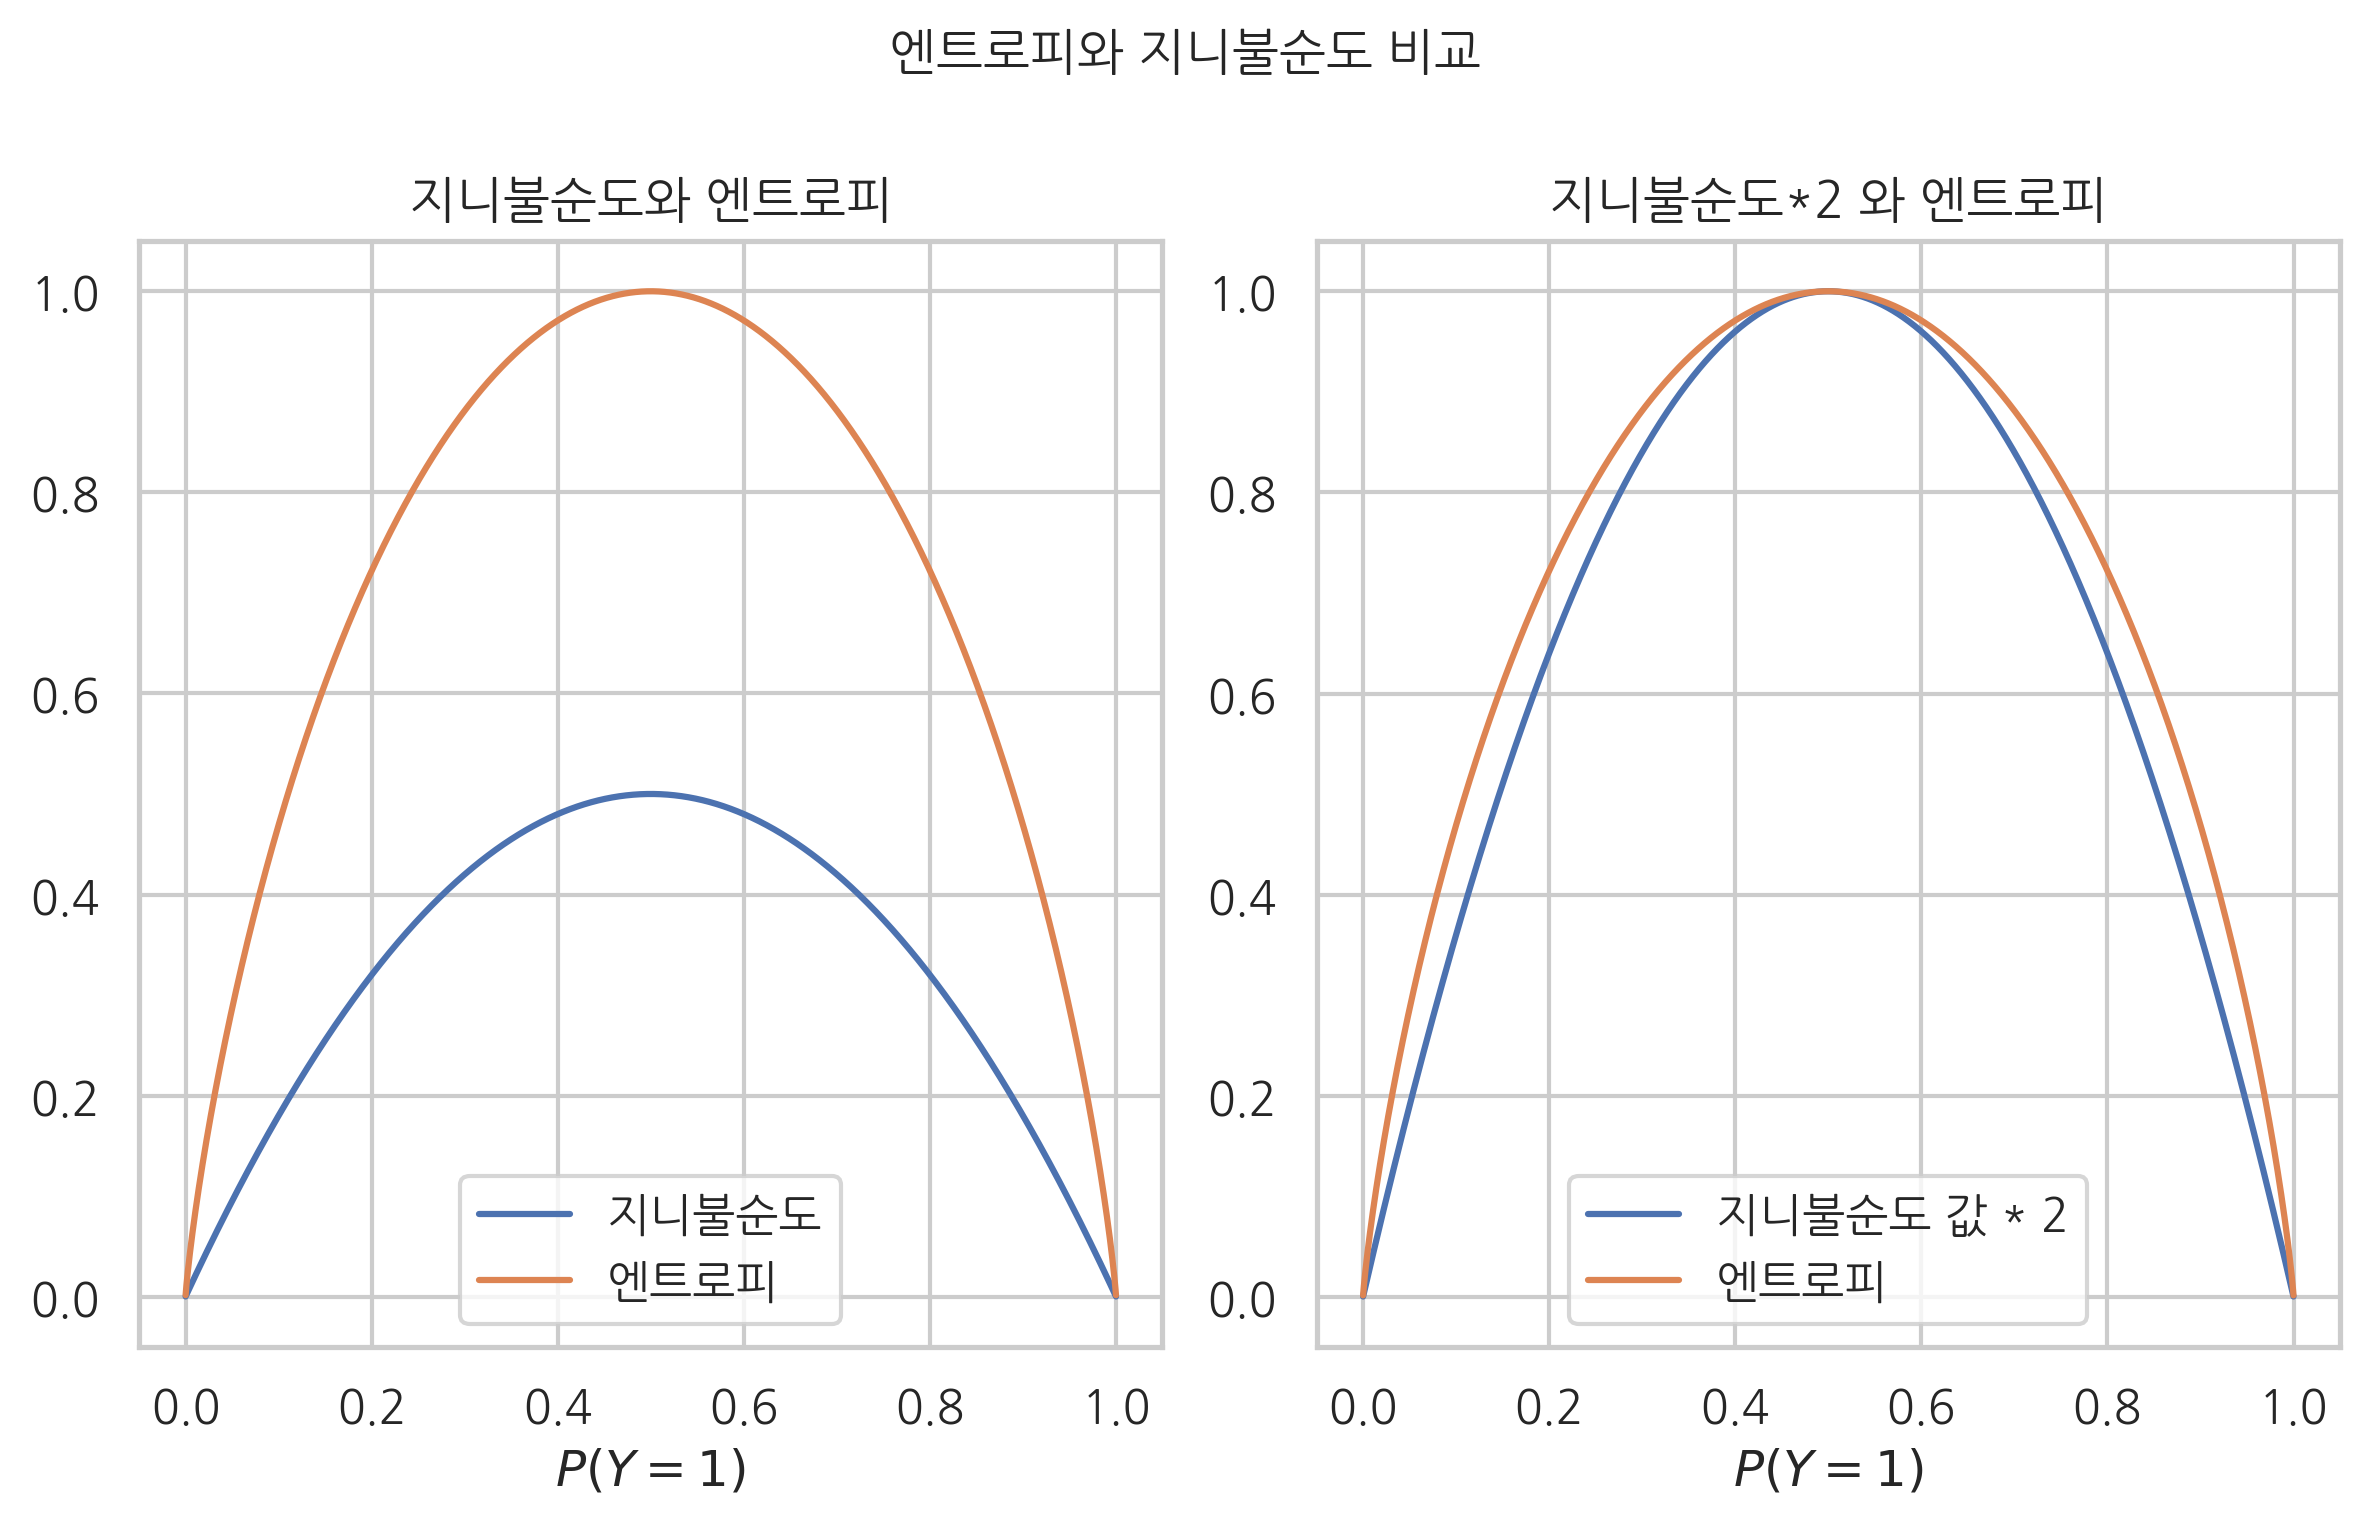

In [113]:
p = np.linspace(0.0001, 1-0.0001, 10000)

G = [p*(1-p)+(1-p)*p for p in p]
H = [-p*np.log2(p)-(1-p)*np.log2(1-p) for p in p]
G2 = [(p*(1-p)+(1-p)*p)*2 for p in p]

plt.subplot(121)
plt.plot(p, G, label='지니불순도')
plt.plot(p, H, label='엔트로피')
plt.title('지니불순도와 엔트로피')
plt.xlabel('$P(Y=1)$')
plt.legend()

plt.subplot(122)
plt.plot(p, G2, label='지니불순도 값 * 2')
plt.plot(p, H, label='엔트로피')
plt.title('지니불순도*2 와 엔트로피')
plt.xlabel('$P(Y=1)$')
plt.legend()

plt.suptitle('엔트로피와 지니불순도 비교', y=1.007)
plt.tight_layout()
plt.show()

# 조건부 엔트로피

In [118]:
-0.4*np.log2(0.4)-0.6*np.log2(0.6)

0.9709505944546686

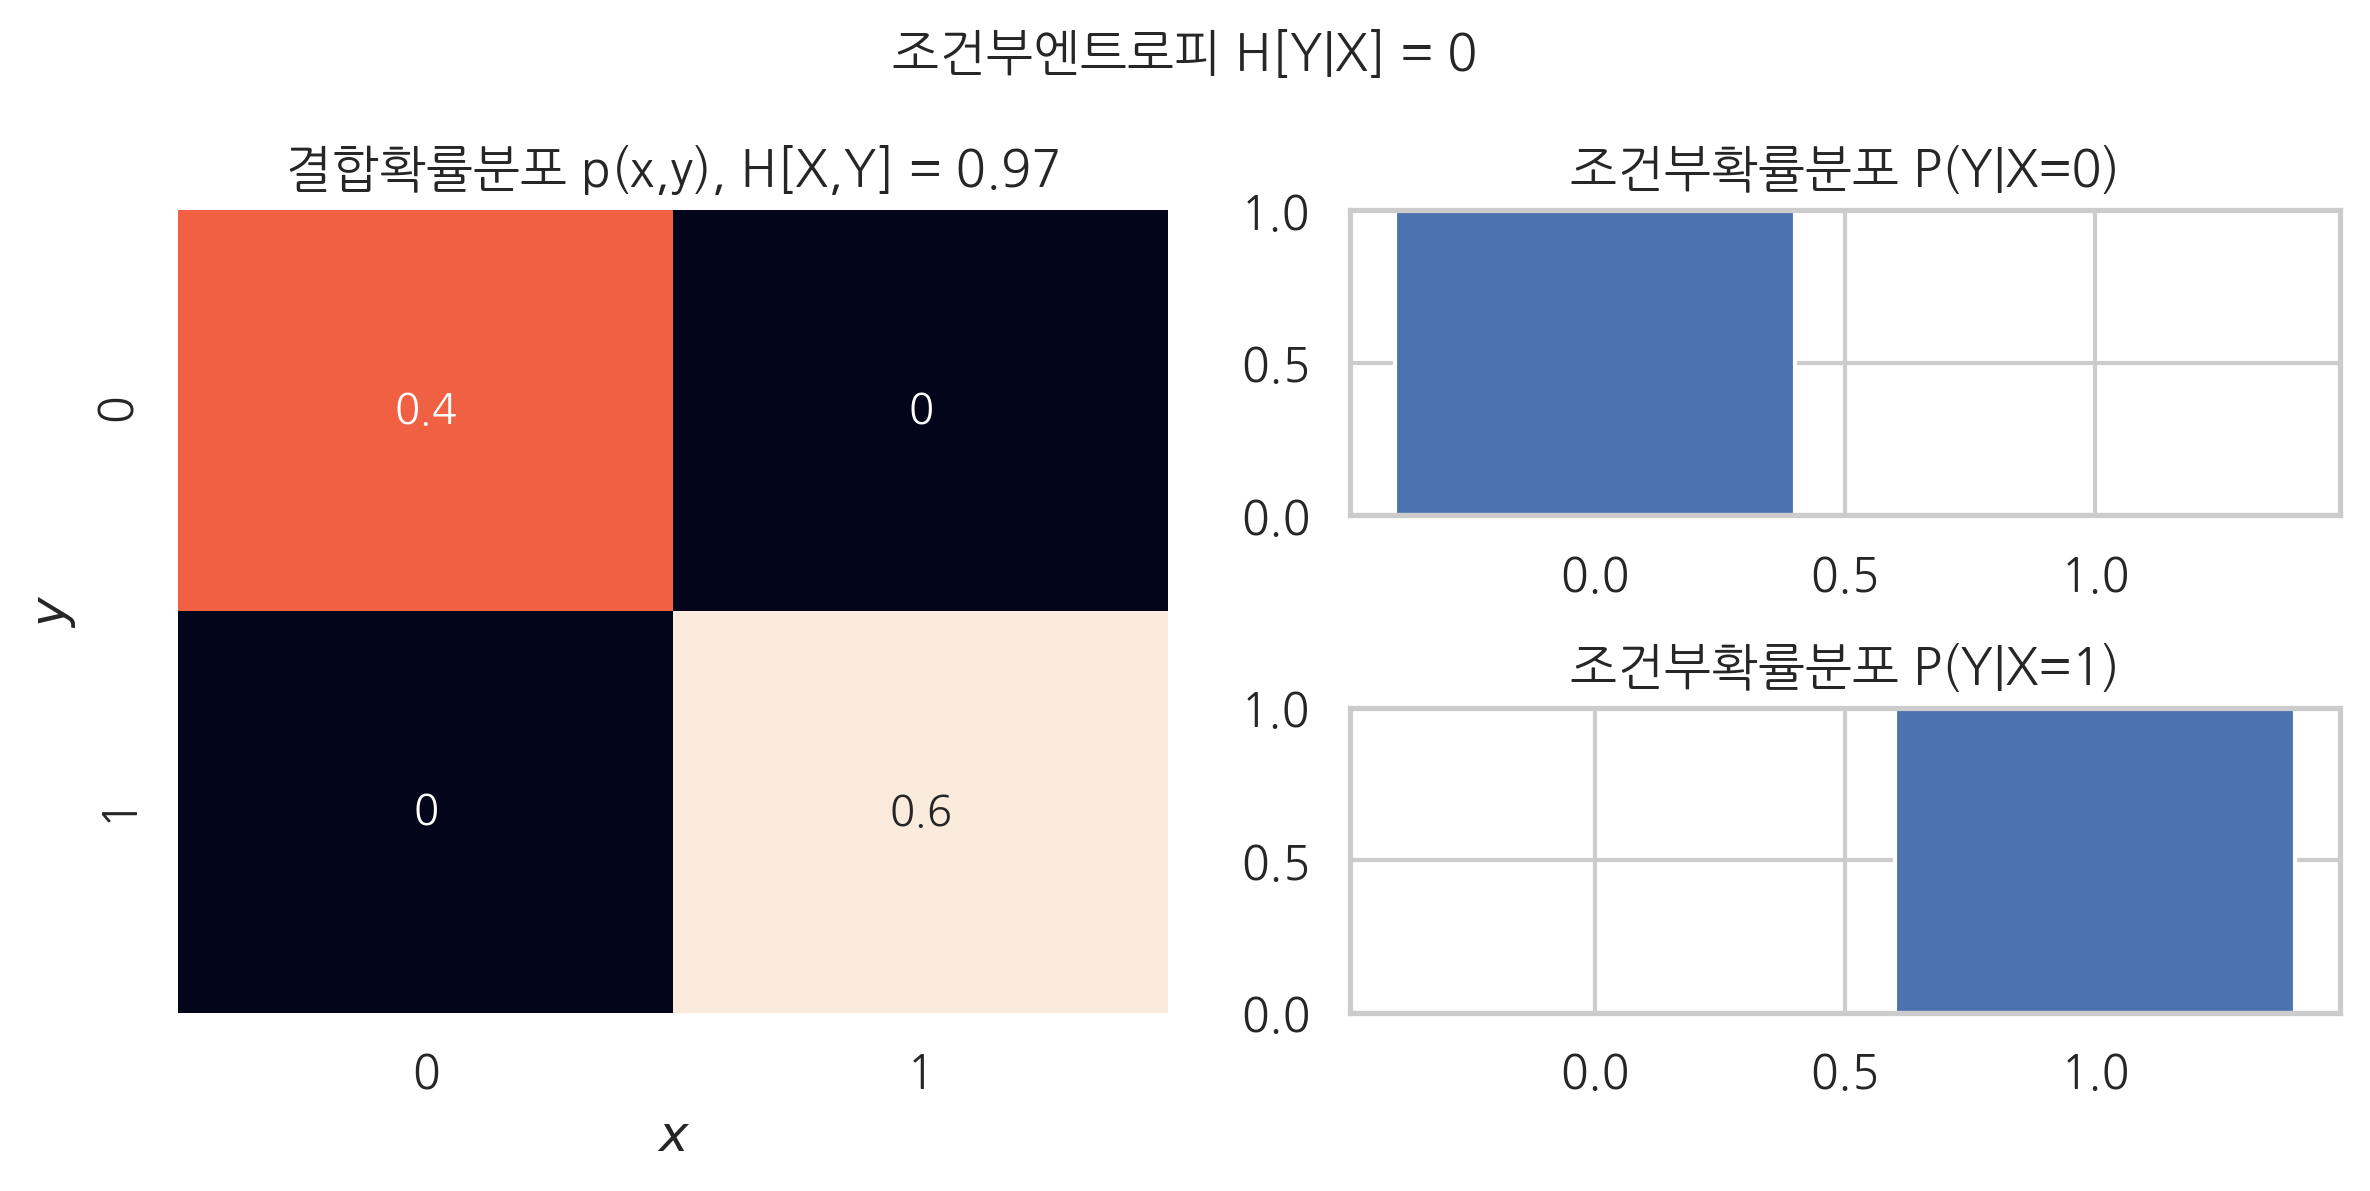

In [129]:
plt.figure(figsize=(8,4))

ax1 = plt.subplot(121)
pXY = np.array([[0.4, 0],[0, 0.6]])
sns.heatmap(pXY, annot=True, cbar=False)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('결합확률분포 p(x,y), H[X,Y] = 0.97')

plt.subplot(222)
plt.bar([0,1],[1,0])
plt.ylim(0,1)
plt.title('조건부확률분포 P(Y|X=0)')

plt.subplot(224)
plt.bar([0,1],[0,1])
plt.ylim(0,1)
plt.title('조건부확률분포 P(Y|X=1)')

plt.suptitle('조건부엔트로피 H[Y|X] = 0')
plt.tight_layout()
plt.show()

In [130]:
-(1/3)*np.log2(1/3)-(2/3)*np.log2(2/3)

0.9182958340544896

In [131]:
(1/3)*0.92+(2/3)*0.92

0.9199999999999999

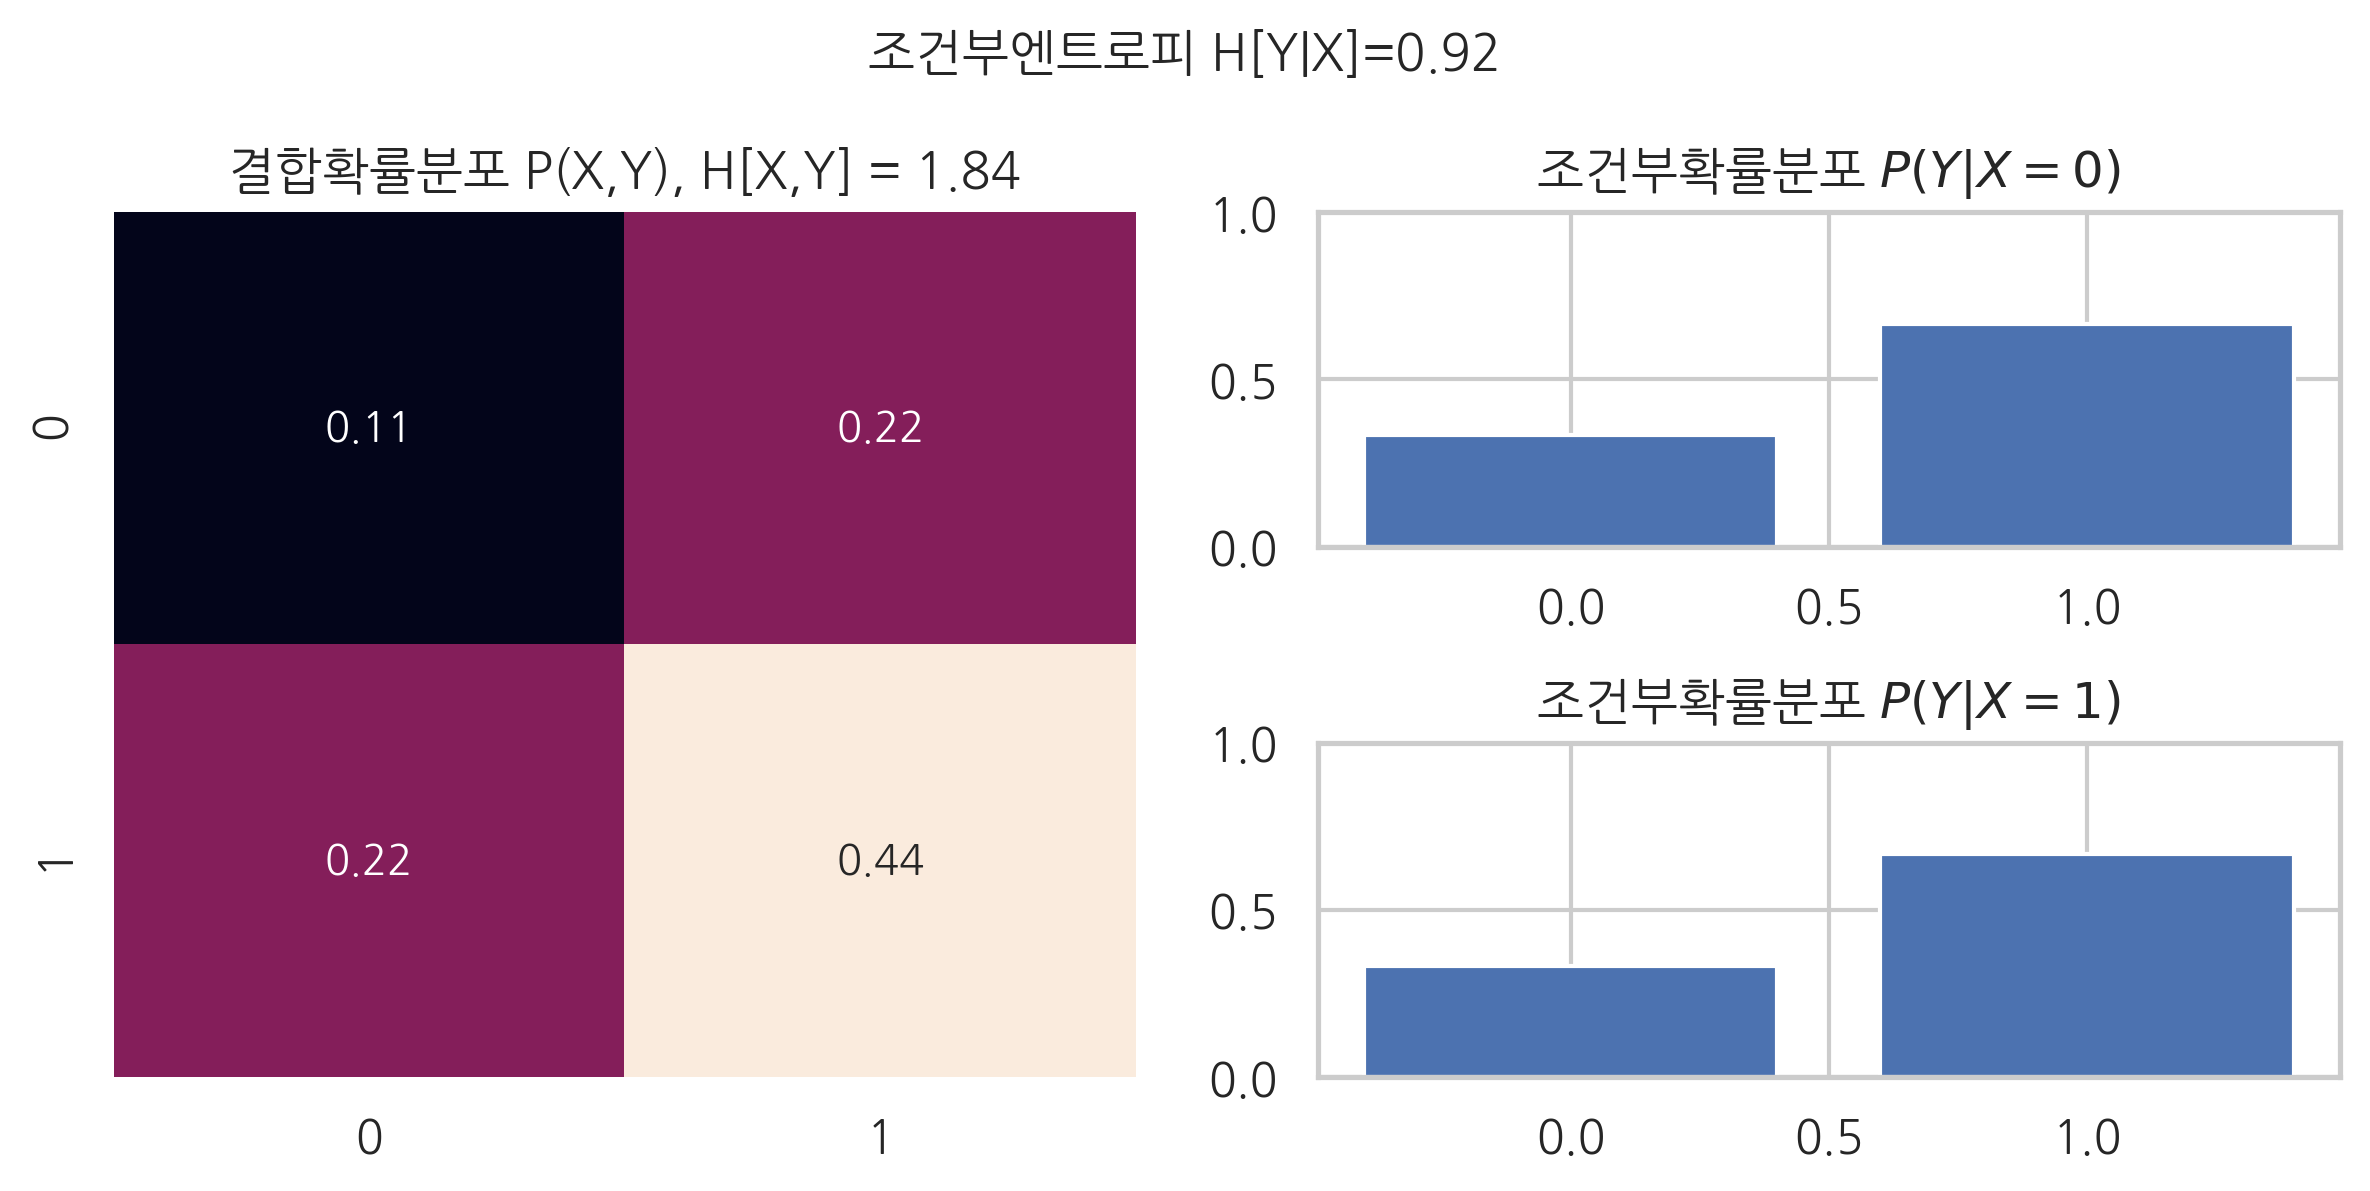

In [137]:
plt.figure(figsize=(8,4))
pXY = np.array([[1/9, 2/9],[2/9, 4/9]])
plt.subplot(121)
sns.heatmap(pXY, annot=True, cbar=False)
plt.title(f'결합확률분포 P(X,Y), H[X,Y] = {HXY}')

plt.subplot(222)
plt.bar([0,1],[1/3, 2/3])
plt.title('조건부확률분포 $P(Y|X=0)$')
plt.ylim(0,1)

plt.subplot(224)
plt.bar([0,1],[1/3, 2/3])
plt.title('조건부확률분포 $P(Y|X=1)$')
plt.ylim(0,1)

plt.suptitle('조건부엔트로피 H[Y|X]=0.92')
plt.tight_layout()
plt.show()

In [133]:
HXY = np.round(-(1/9)*np.log2(1/9)-(2/9)*np.log2(2/9)-(2/9)*np.log2(2/9)-(4/9)*np.log2(4/9), 2)

In [139]:
HY_X1 = (1/2)*(-3/4*np.log2(3/4)-1/4*np.log2(1/4)) + (1/2)*(-1/4*np.log2(1/4)-3/4*np.log2(3/4))
print(f'X_1, Y 조건부 엔트로피 : {HY_X1}')

X_1, Y 조건부 엔트로피 : 0.8112781244591328


In [140]:
HY_X2 = (3/4)*(-1/3*np.log2(1/3)-2/3*np.log2(2/3))
print(f'X_2, Y 조건부 엔트로피 : {HY_X2}')

X_2, Y 조건부 엔트로피 : 0.6887218755408672


In [141]:
print(f'X_3, Y 조건부 엔트로피 : 0')

X_3, Y 조건부 엔트로피 : 0


# Y 예측에 X1 보다 X2가 낫다

In [220]:
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df = df[(df['species'] == 1) | (df['species'] == 2)].reset_index(drop=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1


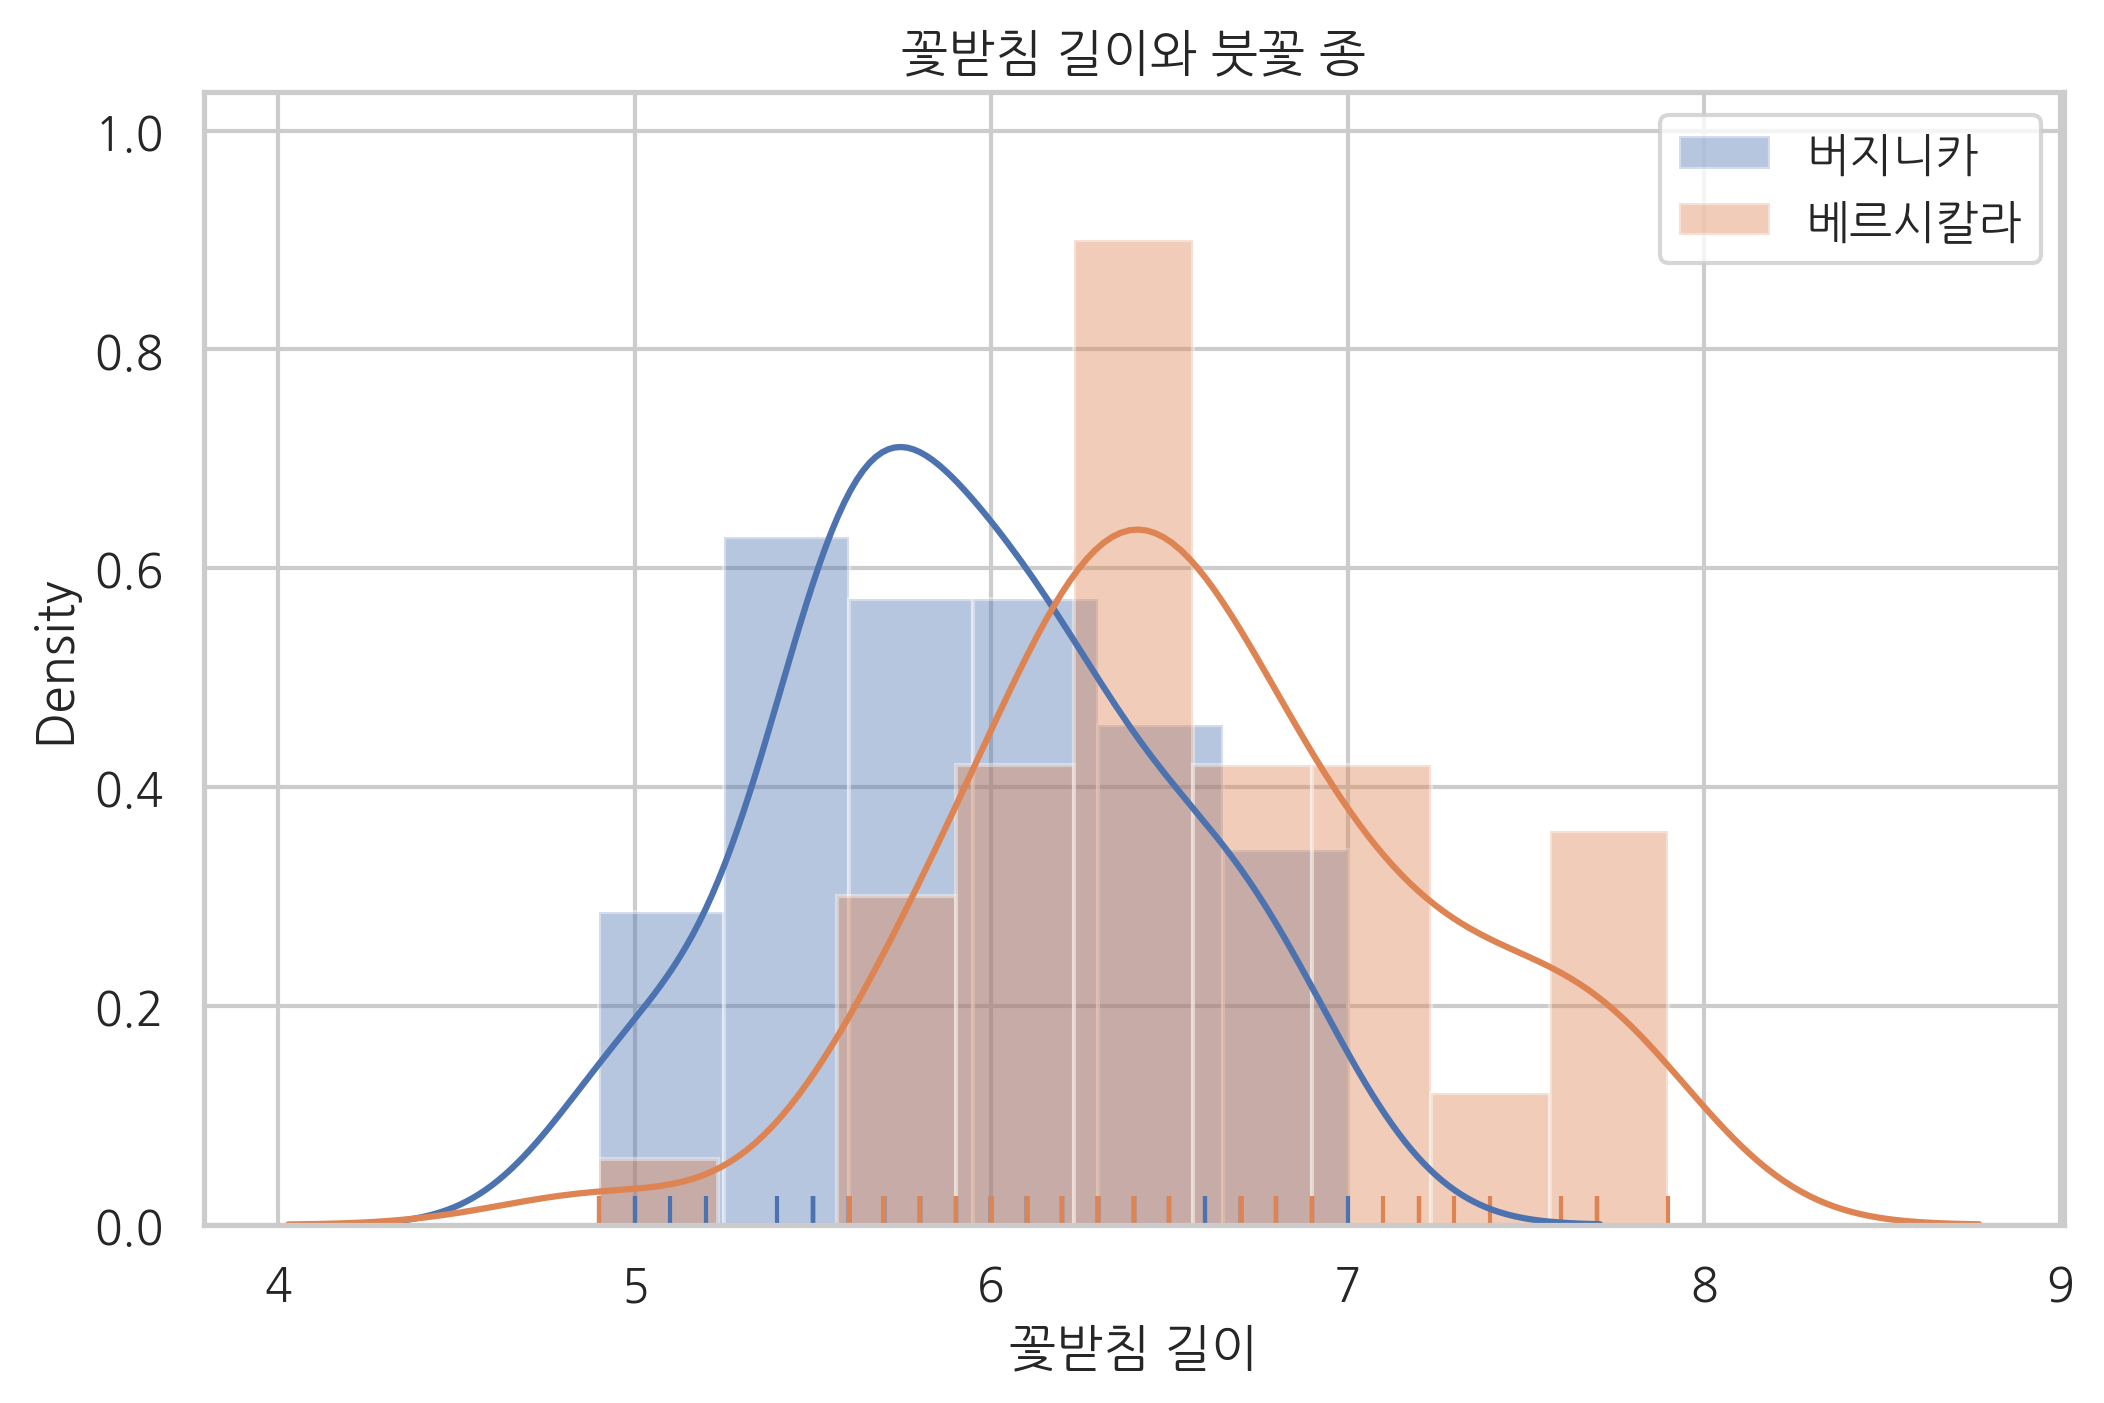

In [161]:
sns.distplot(df[df['species'] == 1]['sepal length (cm)'], hist=True, rug=True, label='버지니카')
sns.distplot(df[df['species'] == 2]['sepal length (cm)'], hist=True, rug=True, label='베르시칼라')
plt.legend()
plt.xlabel('꽃받침 길이')
plt.title('꽃받침 길이와 붓꽃 종')
plt.show()

In [170]:
df['X1'] = df['sepal length (cm)'] > 6
m = df.groupby(['X1', 'species']).size().unstack().fillna(0)
m

species,1,2
X1,,
False,30,9
True,20,41


In [202]:
# 조건부엔트로피 계산함수 
def cond_entropy(df) :
     cond_p1 = df.values[0]/df.values[0].sum()
     cond_p2 = df.values[1]/df.values[1].sum()
     ent1 = sp.stats.entropy(cond_p1, base=2)
     ent2 = sp.stats.entropy(cond_p2, base=2)
     return (df.values[0].sum()/df.values.sum())*ent1 + (df.values[1].sum()/df.values.sum())*ent2
result = cond_entropy(m)  
print(f'꽃받침 길이 6cm 넘는가 - 붓꽃 종류 간 조건부엔트로피  : {result}')

꽃받침 길이 6cm 넘는가 - 붓꽃 종류 간 조건부엔트로피  : 0.8607142715863871


In [212]:
df['X2'] = df['sepal length (cm)'] > 6.5
m2 = df.groupby(['X2', 'species']).size().unstack().fillna(0)
m2

species,1,2
X2,,
False,42,28
True,8,22


In [213]:
cond_entropy(m2)

0.9306576387006184

최적해 : 5.55, 최저 조건부엔트로피 : 1.03


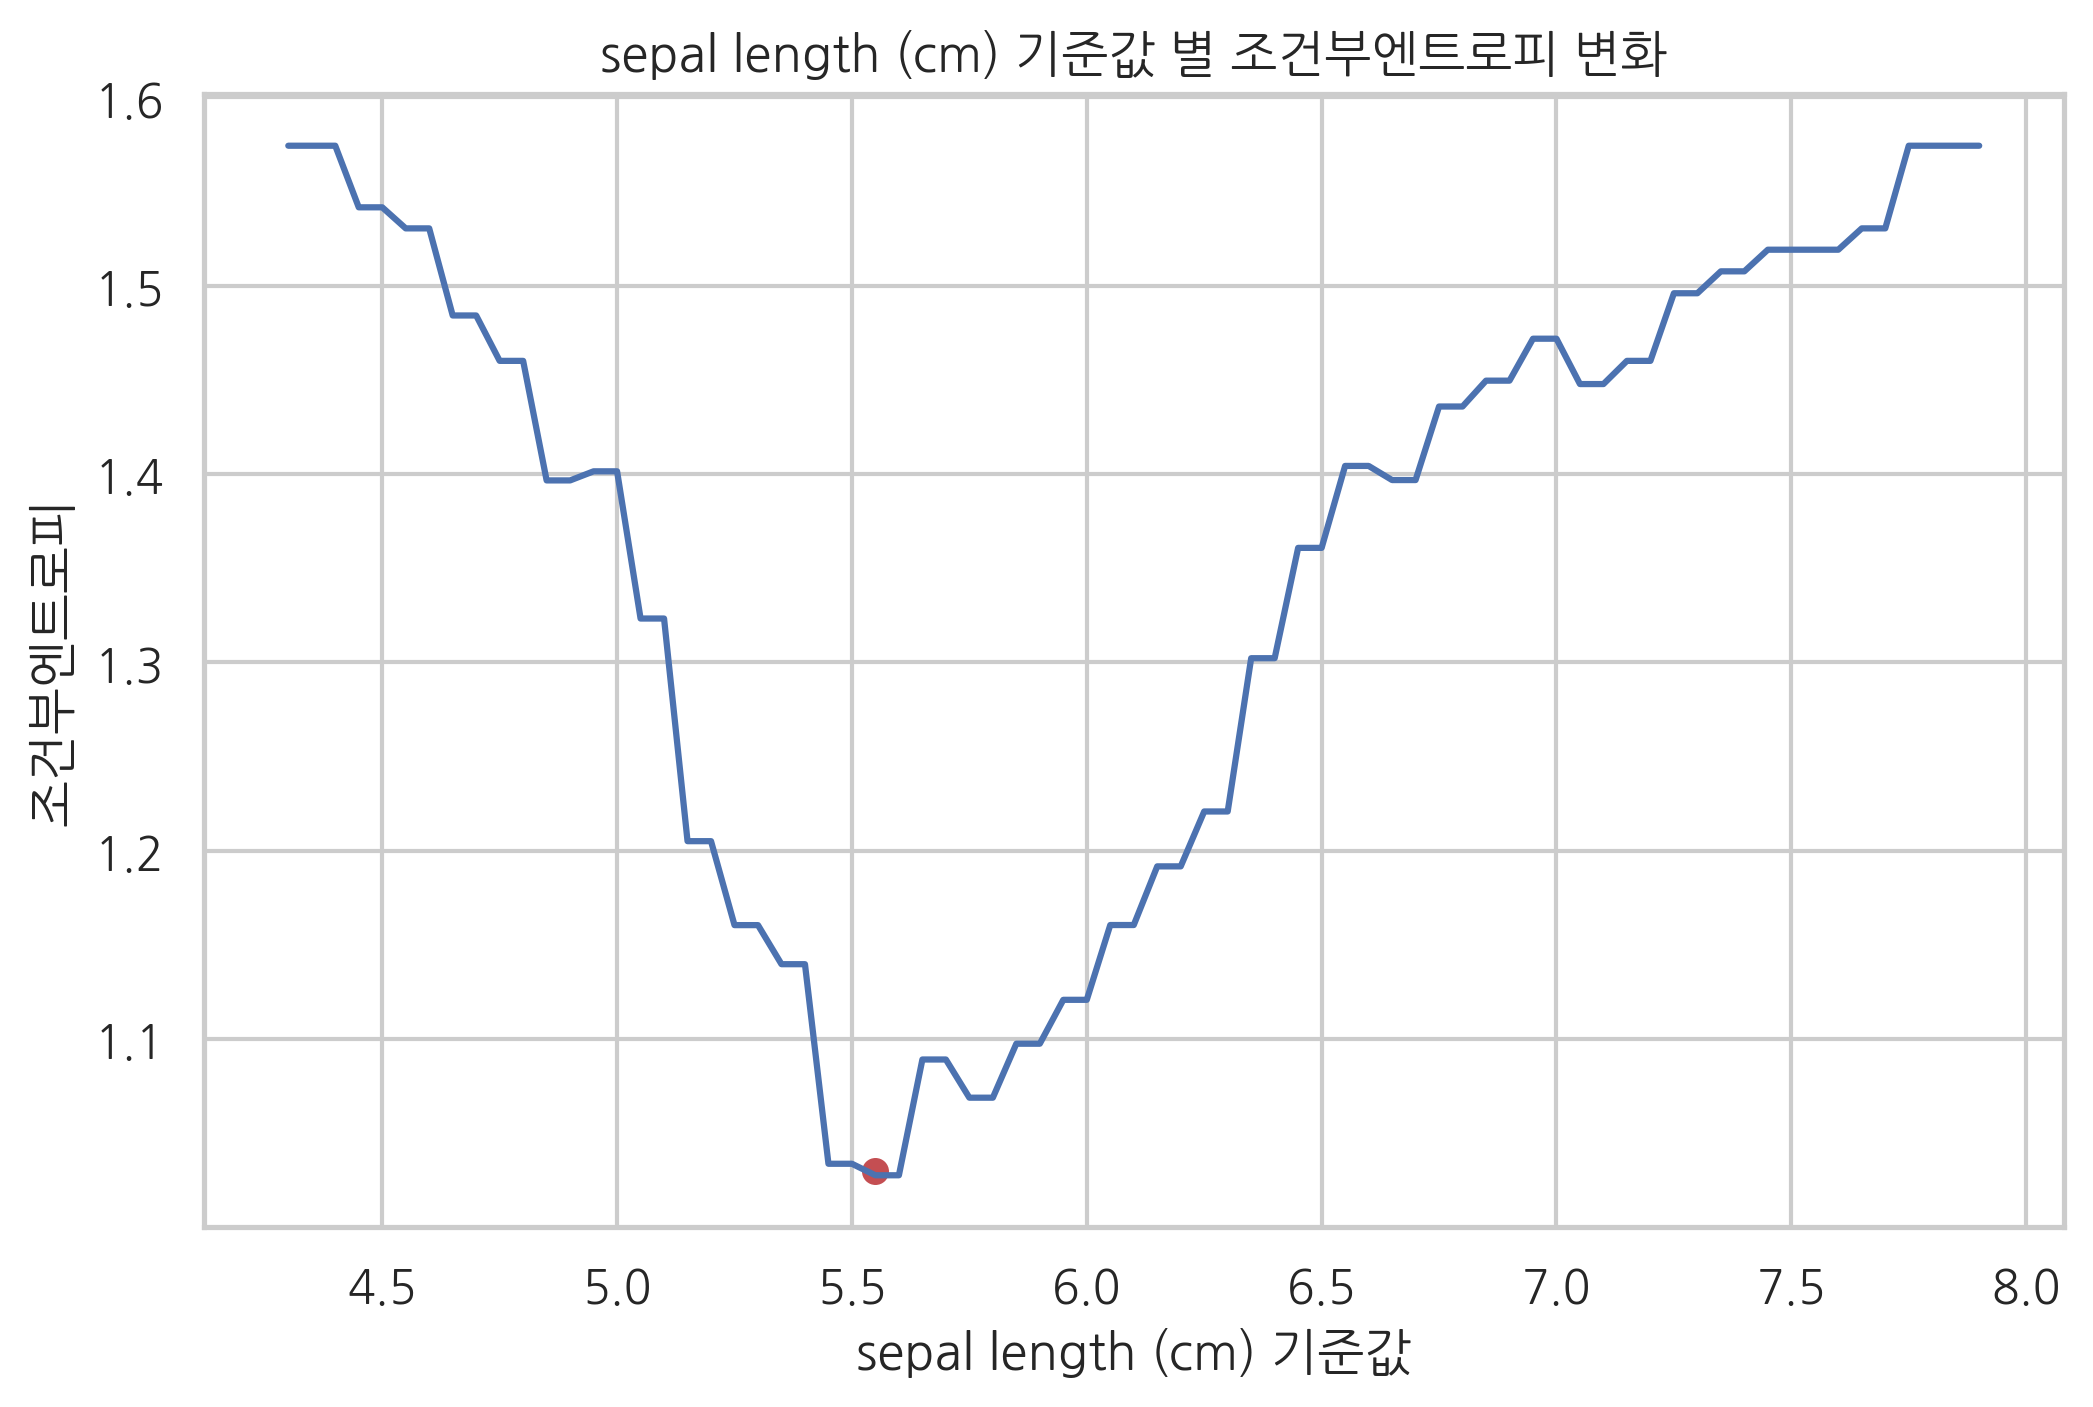

In [107]:
# 10.2.1 연습문제 
# 1. 
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target


def plot_cond_entropy(df, name) : 
    len_min = np.min(df[name].values)
    len_max = np.max(df[name].values)
    xx = np.arange(len_min, len_max+0.05, 0.05)
    entropies = []
    for i in xx : 
        df['X1'] = df[name] > i 
        pivot_table = df.groupby(['X1', 'species']).size().unstack().fillna(0)
        
        cond_p1 = pivot_table.values[0]/pivot_table.values[0].sum()
        cond_p2 = pivot_table.values[1]/pivot_table.values[1].sum()
        ent1 = sp.stats.entropy(cond_p1, base=2)
        ent2 = sp.stats.entropy(cond_p2, base=2)
        cond_entropy = (pivot_table.values[0].sum()/pivot_table.values.sum())*ent1 + (pivot_table.values[1].sum()/pivot_table.values.sum())*ent2
        entropies.append(cond_entropy)

    ind = entropies.index(np.min(entropies))
    optimized_value = np.round(xx[ind],2) ; min_ent = np.round(np.min(entropies),2)
    print(f'최적해 : {optimized_value}, 최저 조건부엔트로피 : {min_ent}')
    plt.plot(xx, entropies)
    plt.scatter(optimized_value, min_ent, 30, 'r')
    plt.title(f'{name} 기준값 별 조건부엔트로피 변화')
    plt.xlabel(f'{name} 기준값')
    plt.ylabel('조건부엔트로피')
    plt.show()

plot_cond_entropy(df, 'sepal length (cm)')

최적해 : 3.35, 최저 조건부엔트로피 : 1.3


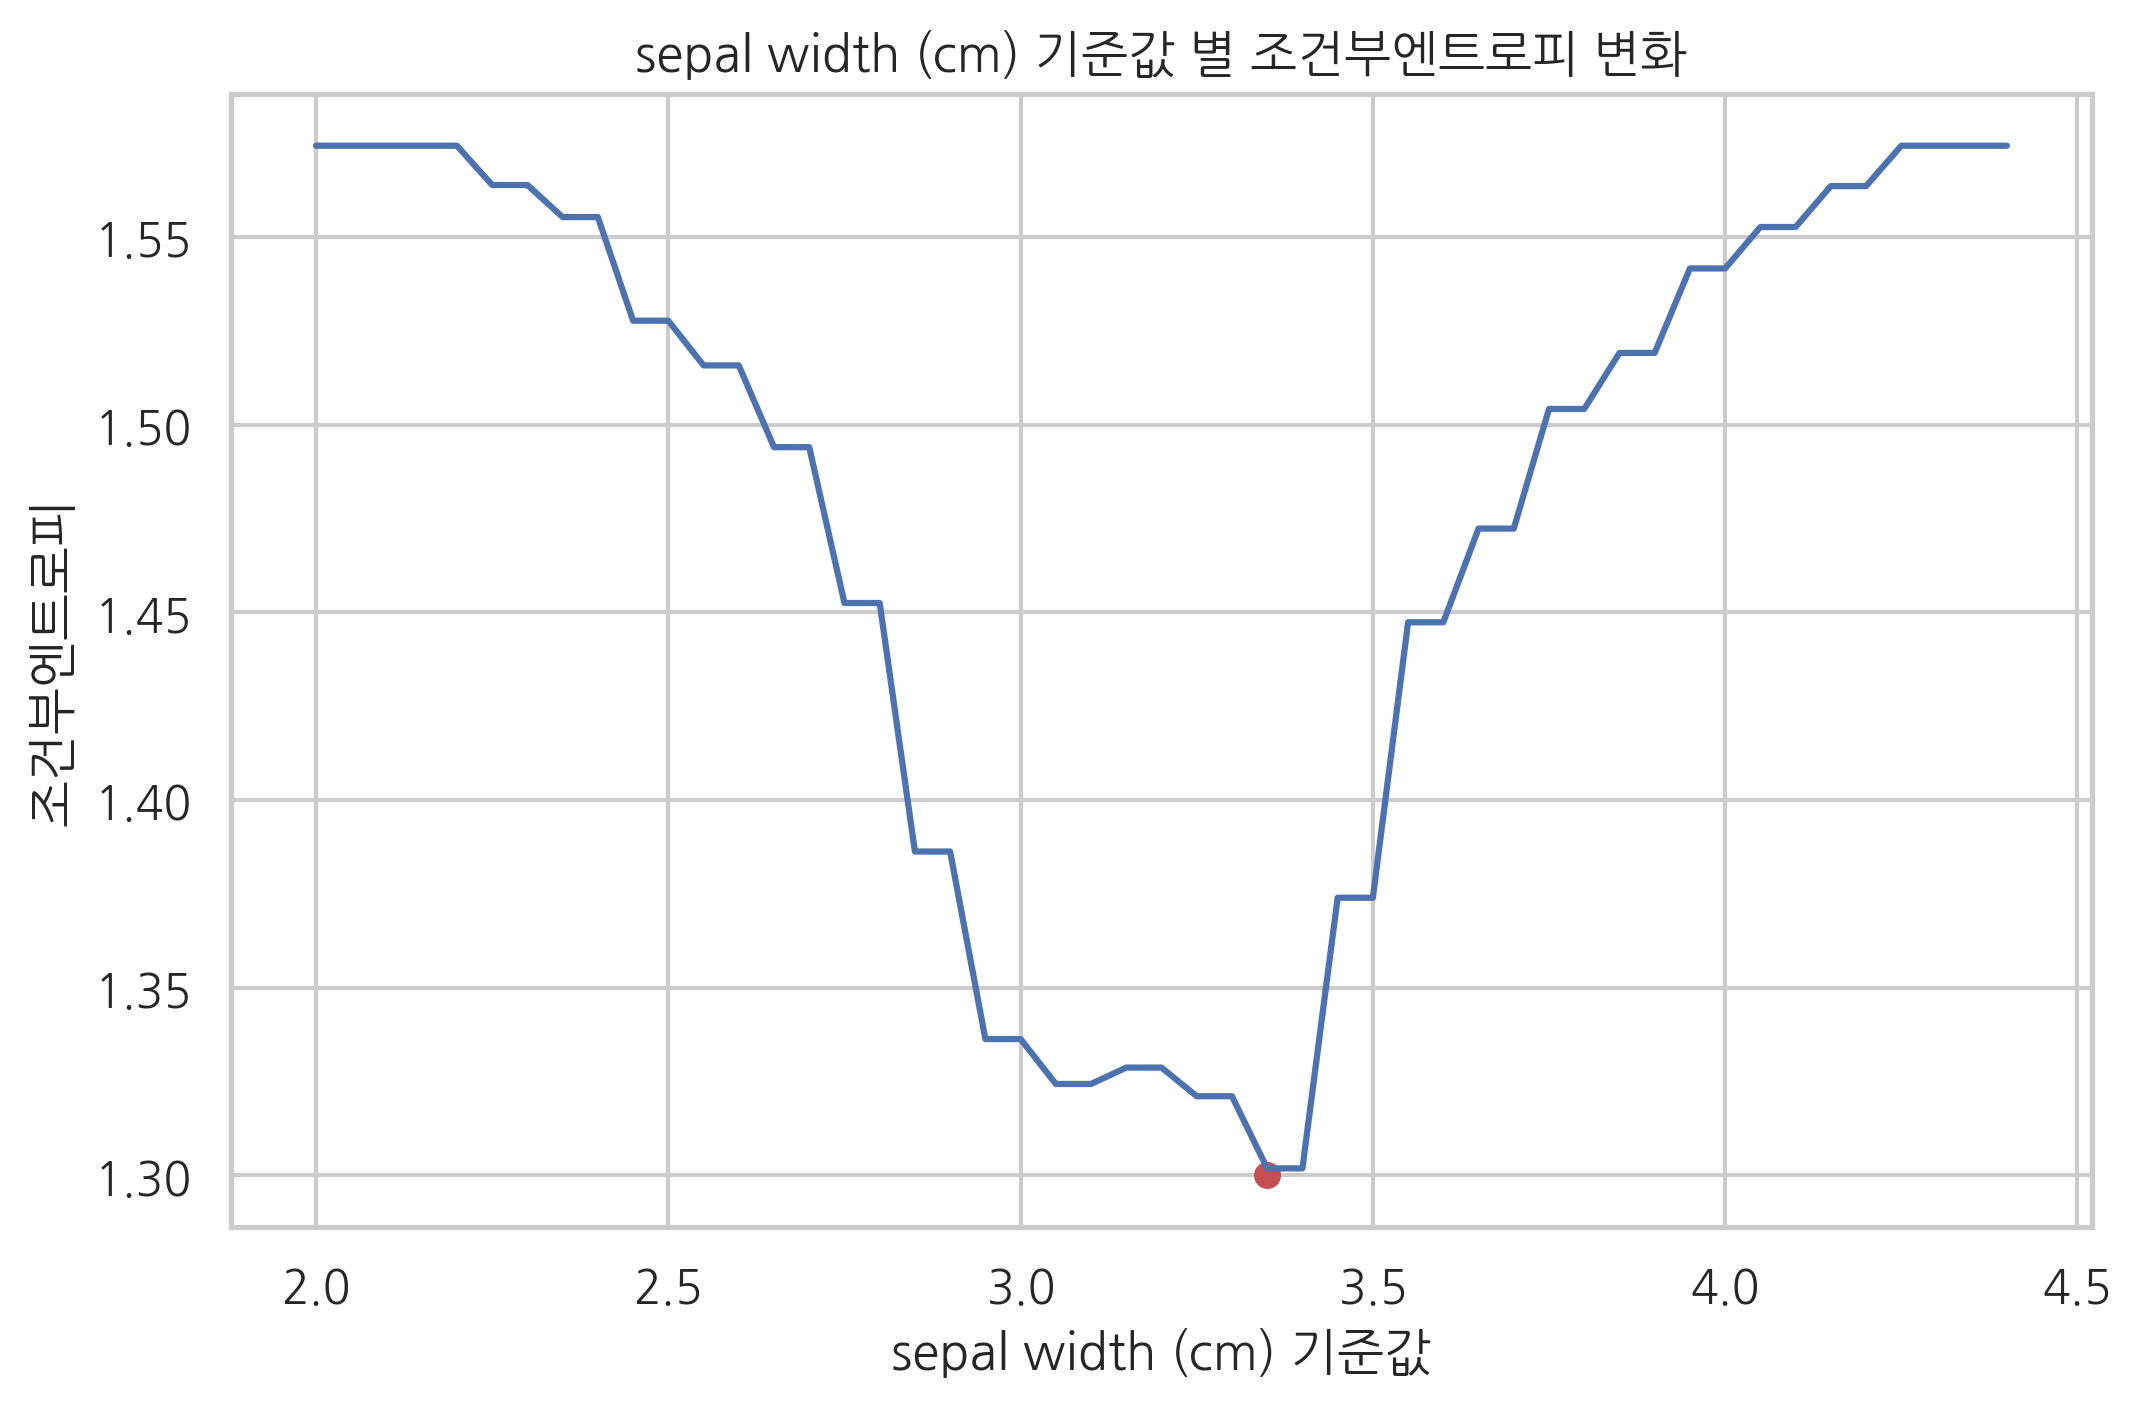

In [108]:
plot_cond_entropy(df, 'sepal width (cm)')

# 분류문제를 위해 sepal length (cm) 를 특징값으로 선택하는 것이 낫다

# 교차엔트로피, 쿨백-라이블러발산(상대 엔트로피)

Text(0.5, 1.0, 'p = [0.5, 0.25, 0.125, 0.125]')

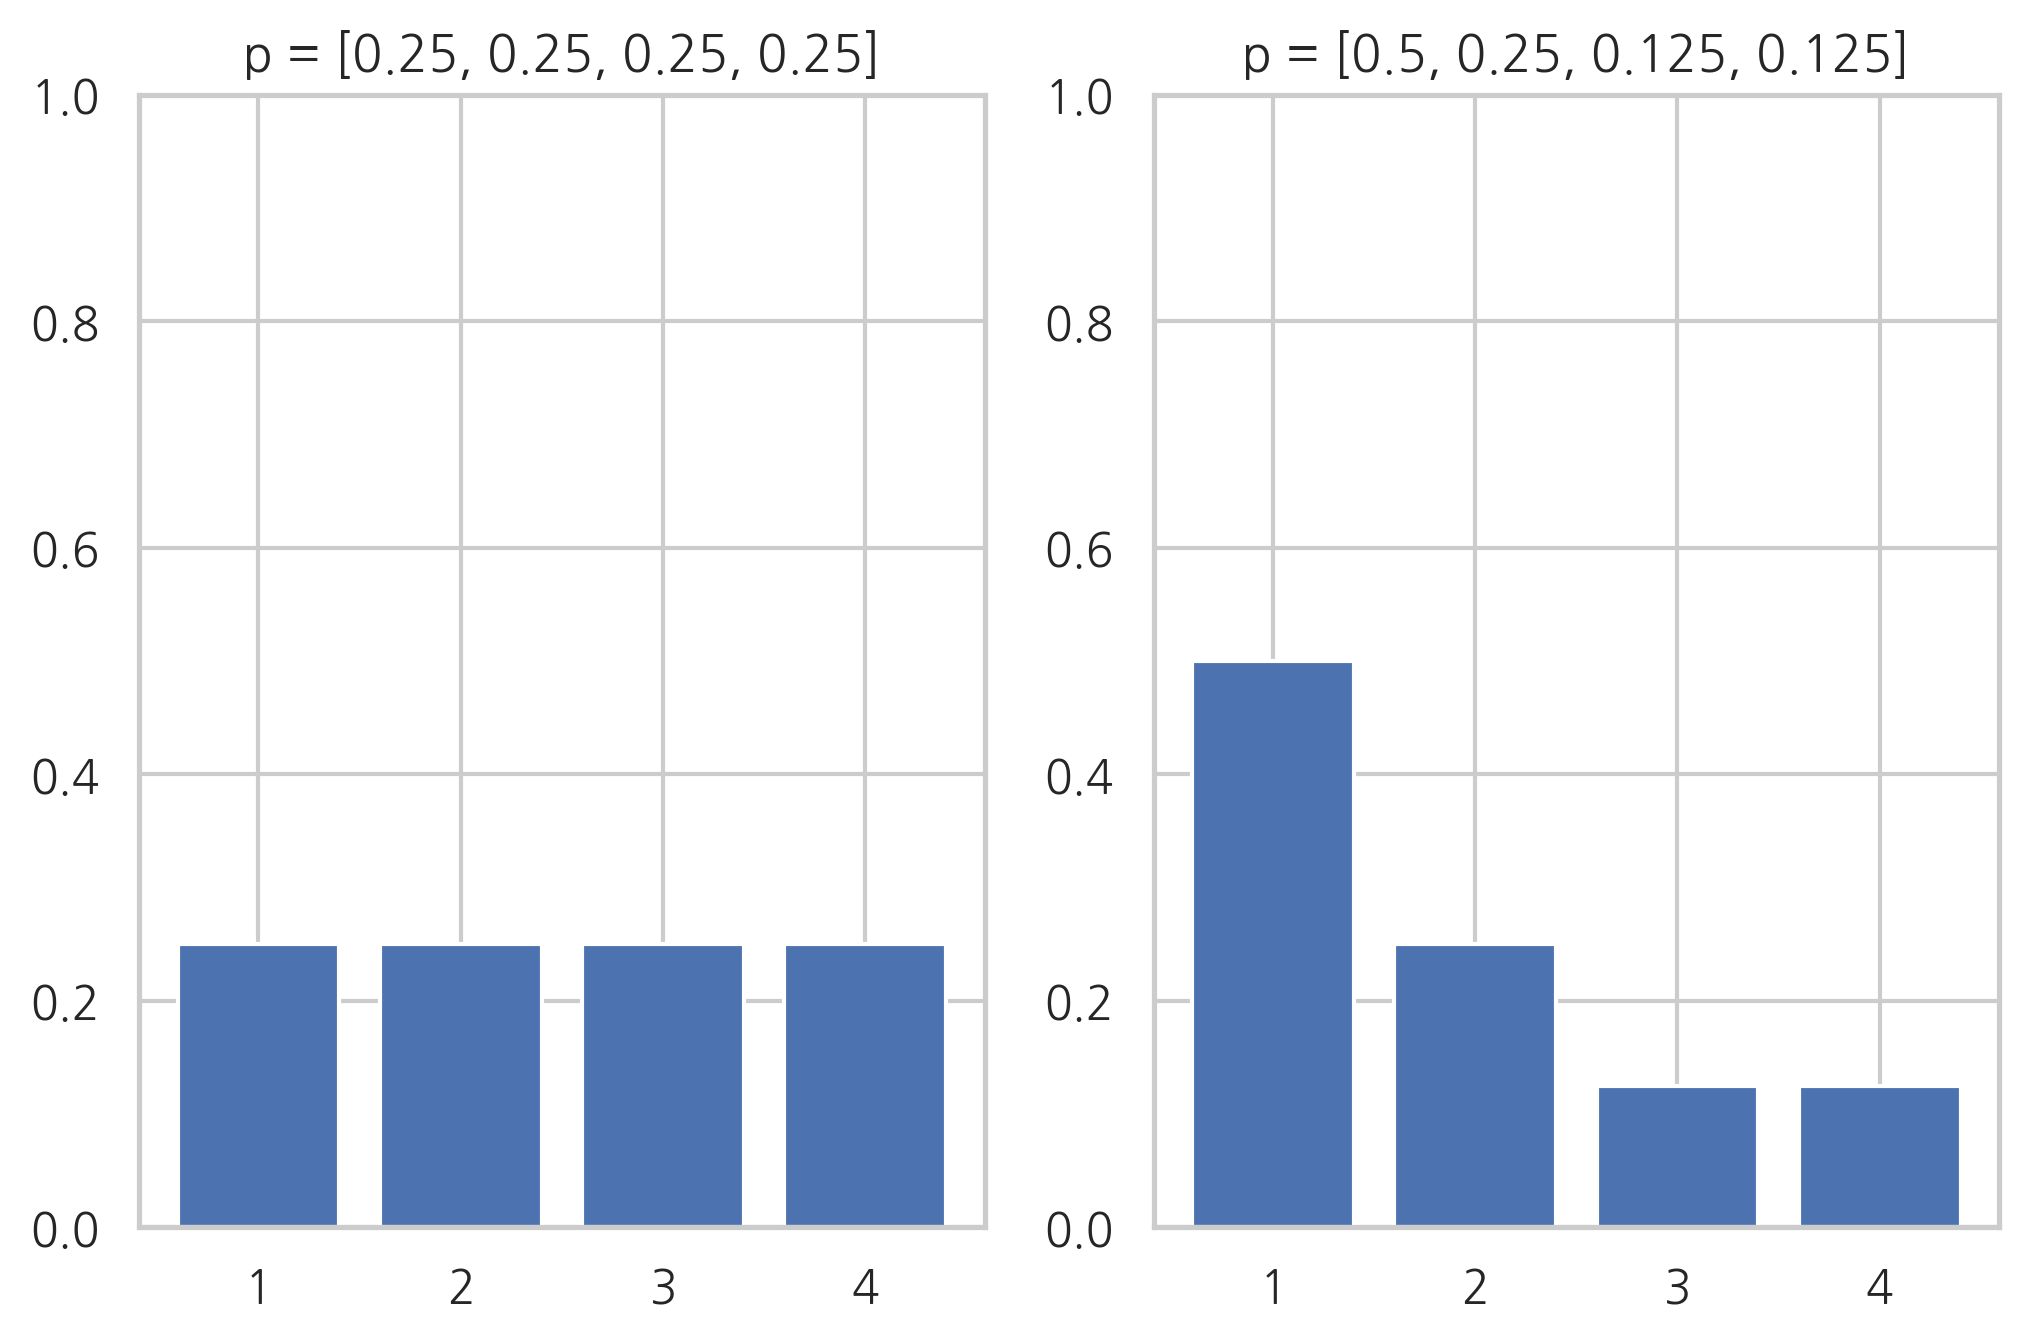

In [250]:
p = [1/4]*4
q = [1/2, 1/4, 1/8, 1/8]

plt.subplot(121)
plt.bar(np.arange(1,5), p)
plt.ylim(0,1)
plt.title(f'p = {p}')

plt.subplot(122)
plt.ylim(0,1)
plt.bar(np.arange(1,5), q)
plt.title(f'p = {q}')

In [55]:
# 교차엔트로피 
def calc_cross_entropy(p, q) : 
    zipped = list(zip(p,q))
    cross_entropy = 0
    for p,q in zipped : 
        cross_entropy += -p*np.log2(q)
    return cross_entropy

p = [1/4]*3+[1/10]
q = [1/4]*4
calc_cross_entropy(p,q)

1.7

In [320]:
rv = sp.stats.bernoulli(p=0.3).rvs(10, random_state=0)
q = np.bincount(rv)/10

p = np.array([0.7, 0.3])
calc_cross_entropy(p, q)

0.8812908992306927

In [327]:
p = [1/2, 1/9]
q = [1/2, 1/9]

calc_cross_entropy(p, q)

0.8522138890491457

In [325]:
p = [1/2, 1/3, 1/9]
q = [1/2, 1/3, 1/3]

calc_cross_entropy(p, q)

1.4245614587540079

Text(0.5, 0, '$\\mu$')

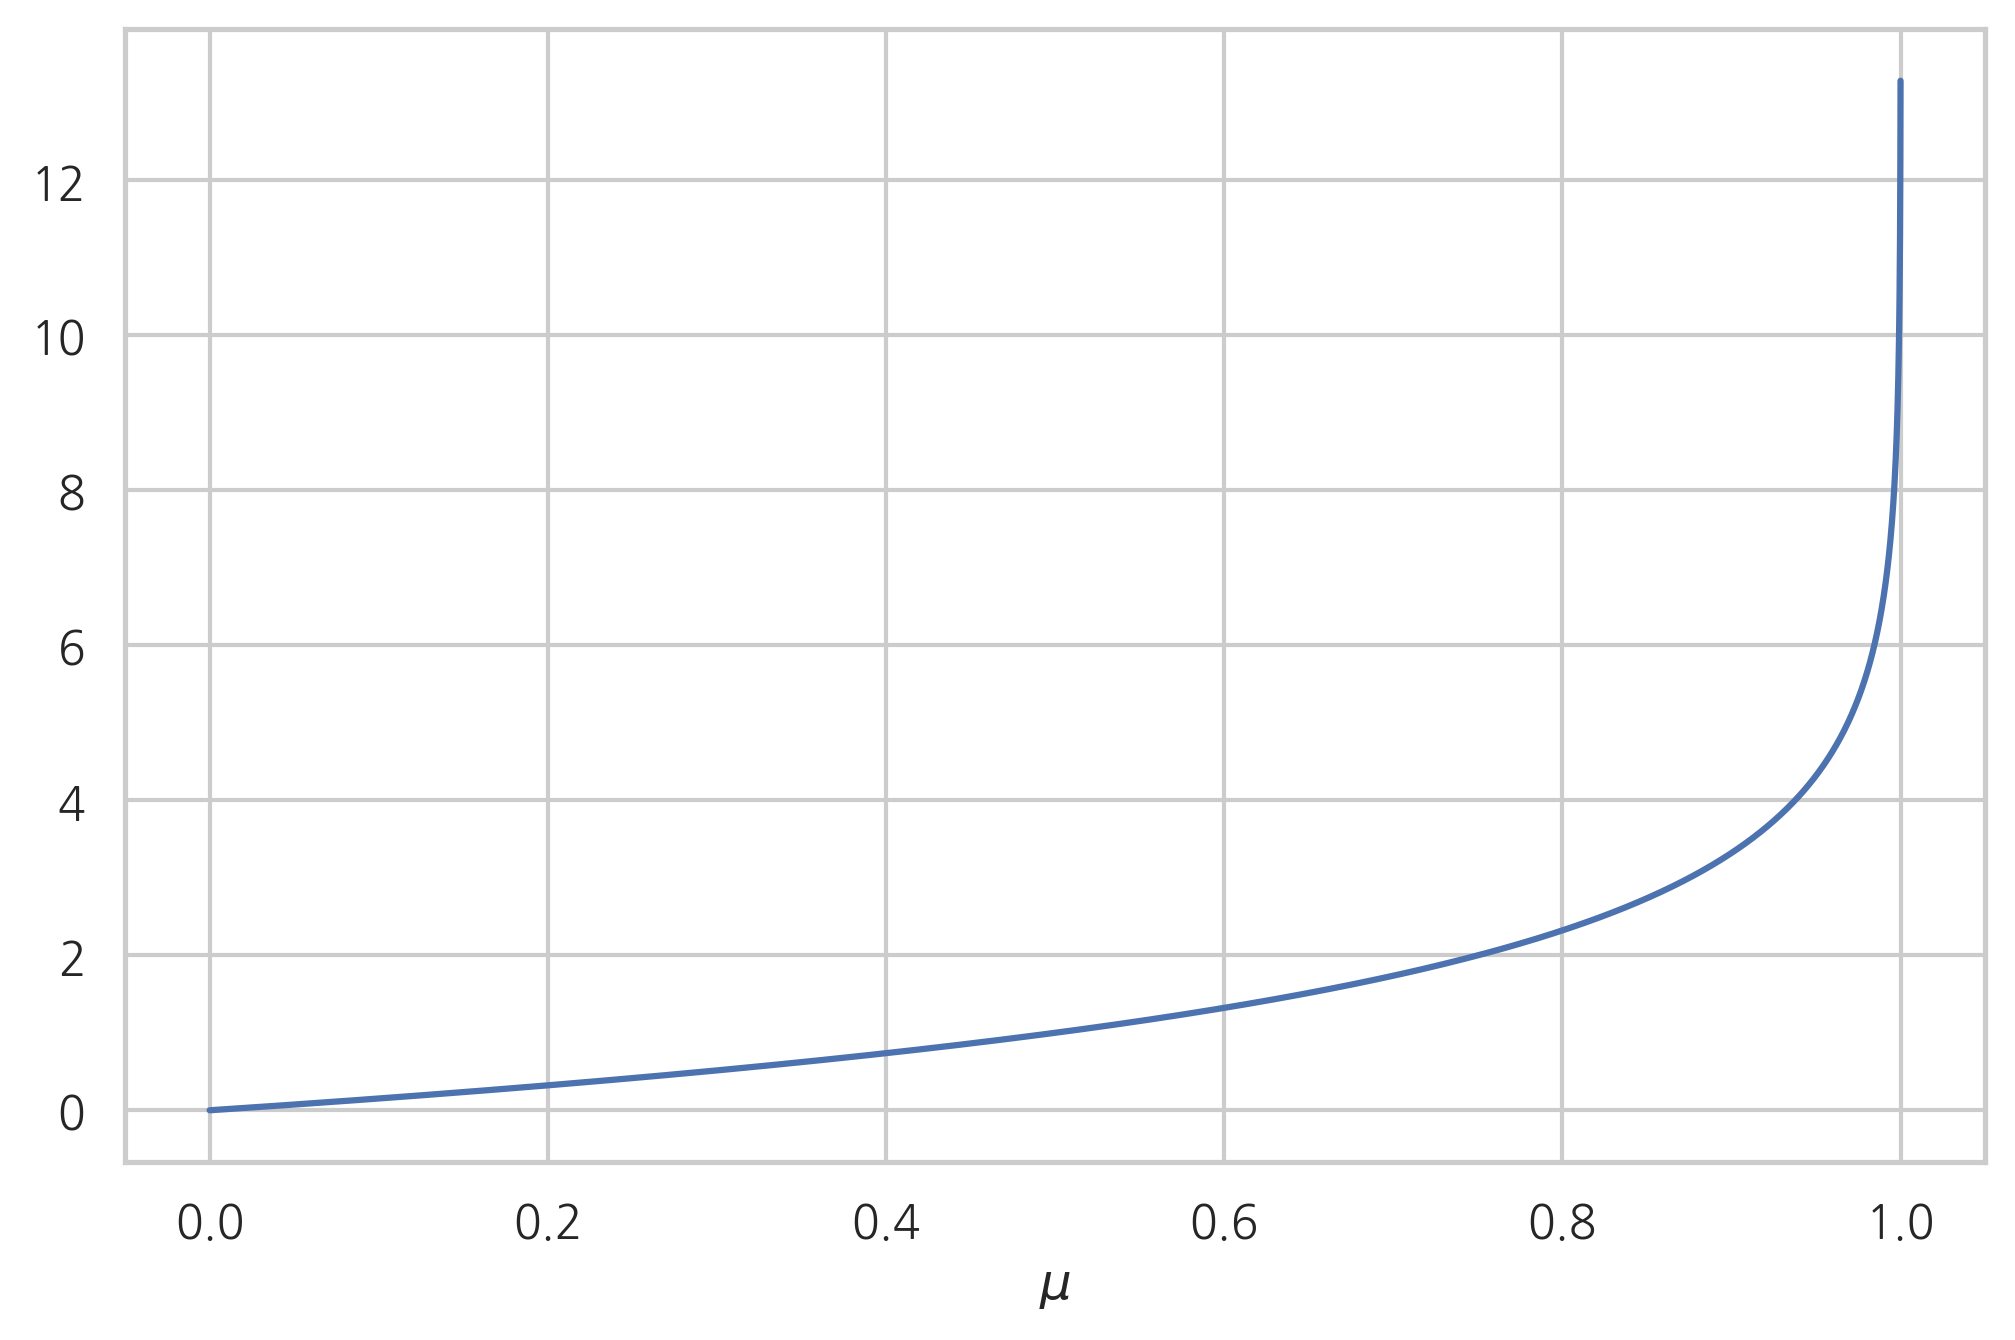

In [331]:
mu = np.linspace(0, 1, 10000)
def lo(mu) : 
    return -np.log2(1-mu)
y = lo(mu)
plt.plot(mu, y)
plt.xlabel('$\mu$')

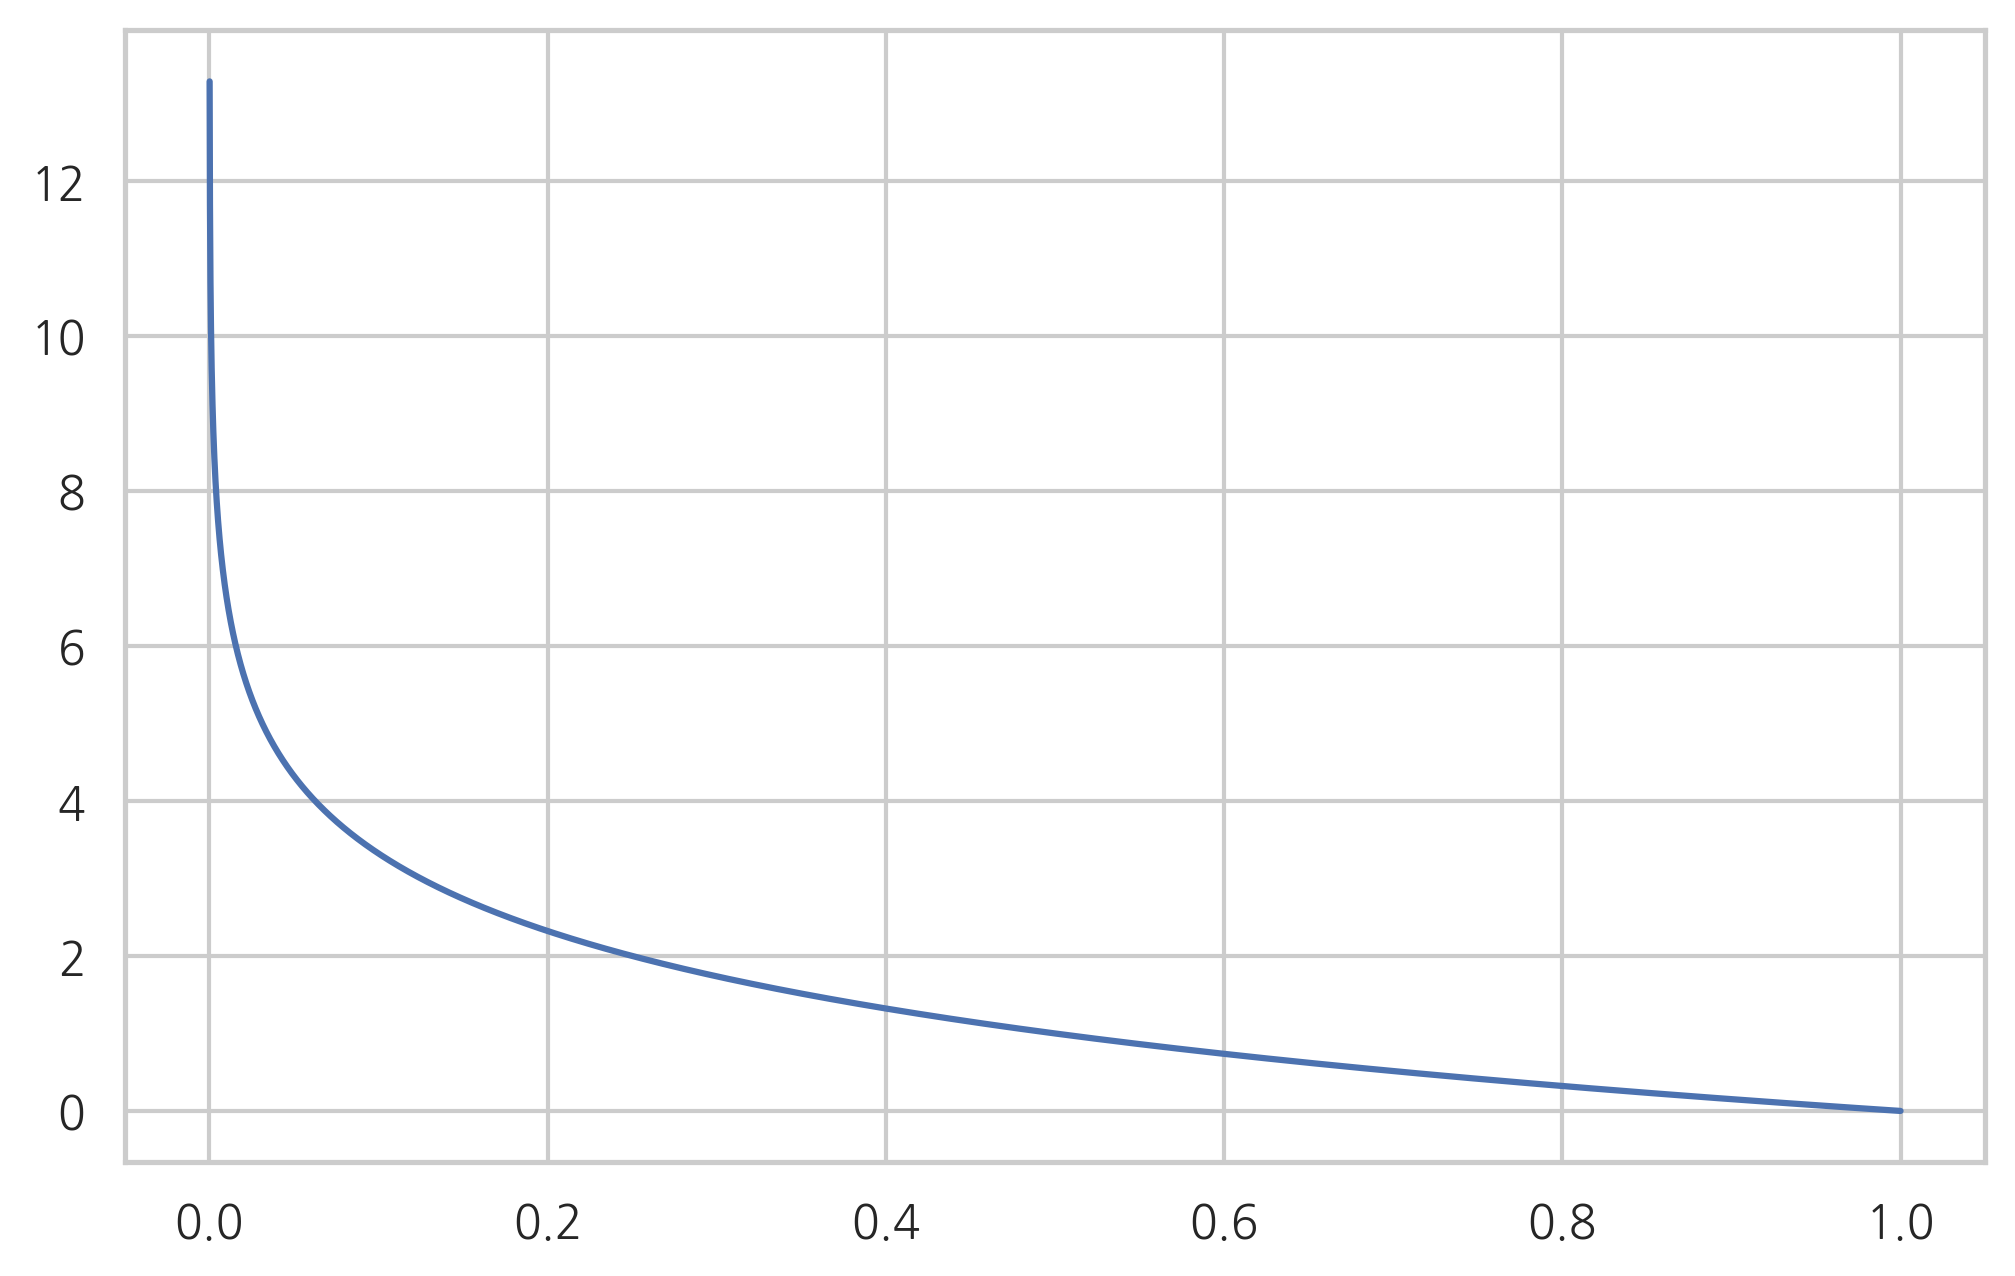

In [332]:
def lo2(mu) : 
    return -np.log2(mu)
plt.plot(mu, lo2(mu))

In [346]:
eps = np.finfo(float).eps
p = [eps,eps,eps,1]
q = [eps,eps,eps,1]


calc_cross_entropy(p, q)

3.4638958368304884e-14

In [360]:
p = [1/4, 1/2, 1/4]
calc_cross_entropy(p,p) - sp.stats.entropy(p)

0.4602792291600821

In [361]:
sp.stats.entropy(p)

1.0397207708399179

In [362]:
sp.stats.entropy([1/4,1/4, 1/4,1/4], [1/4, 1/4, 1/4, 1/4])

0.0

In [394]:
p = [eps, eps, eps, 1]
q = [1/4, 1/4, 1/4, 1/4]

calc_cross_entropy(p, q)

2.0000000000000013

In [395]:
p = [0,0,0,1]
sp.stats.entropy(p,q, base=2)

2.0

# 로그손실 _ 08.14

In [138]:
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df = df[(df['species'] == 0) | (df['species'] == 1)]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


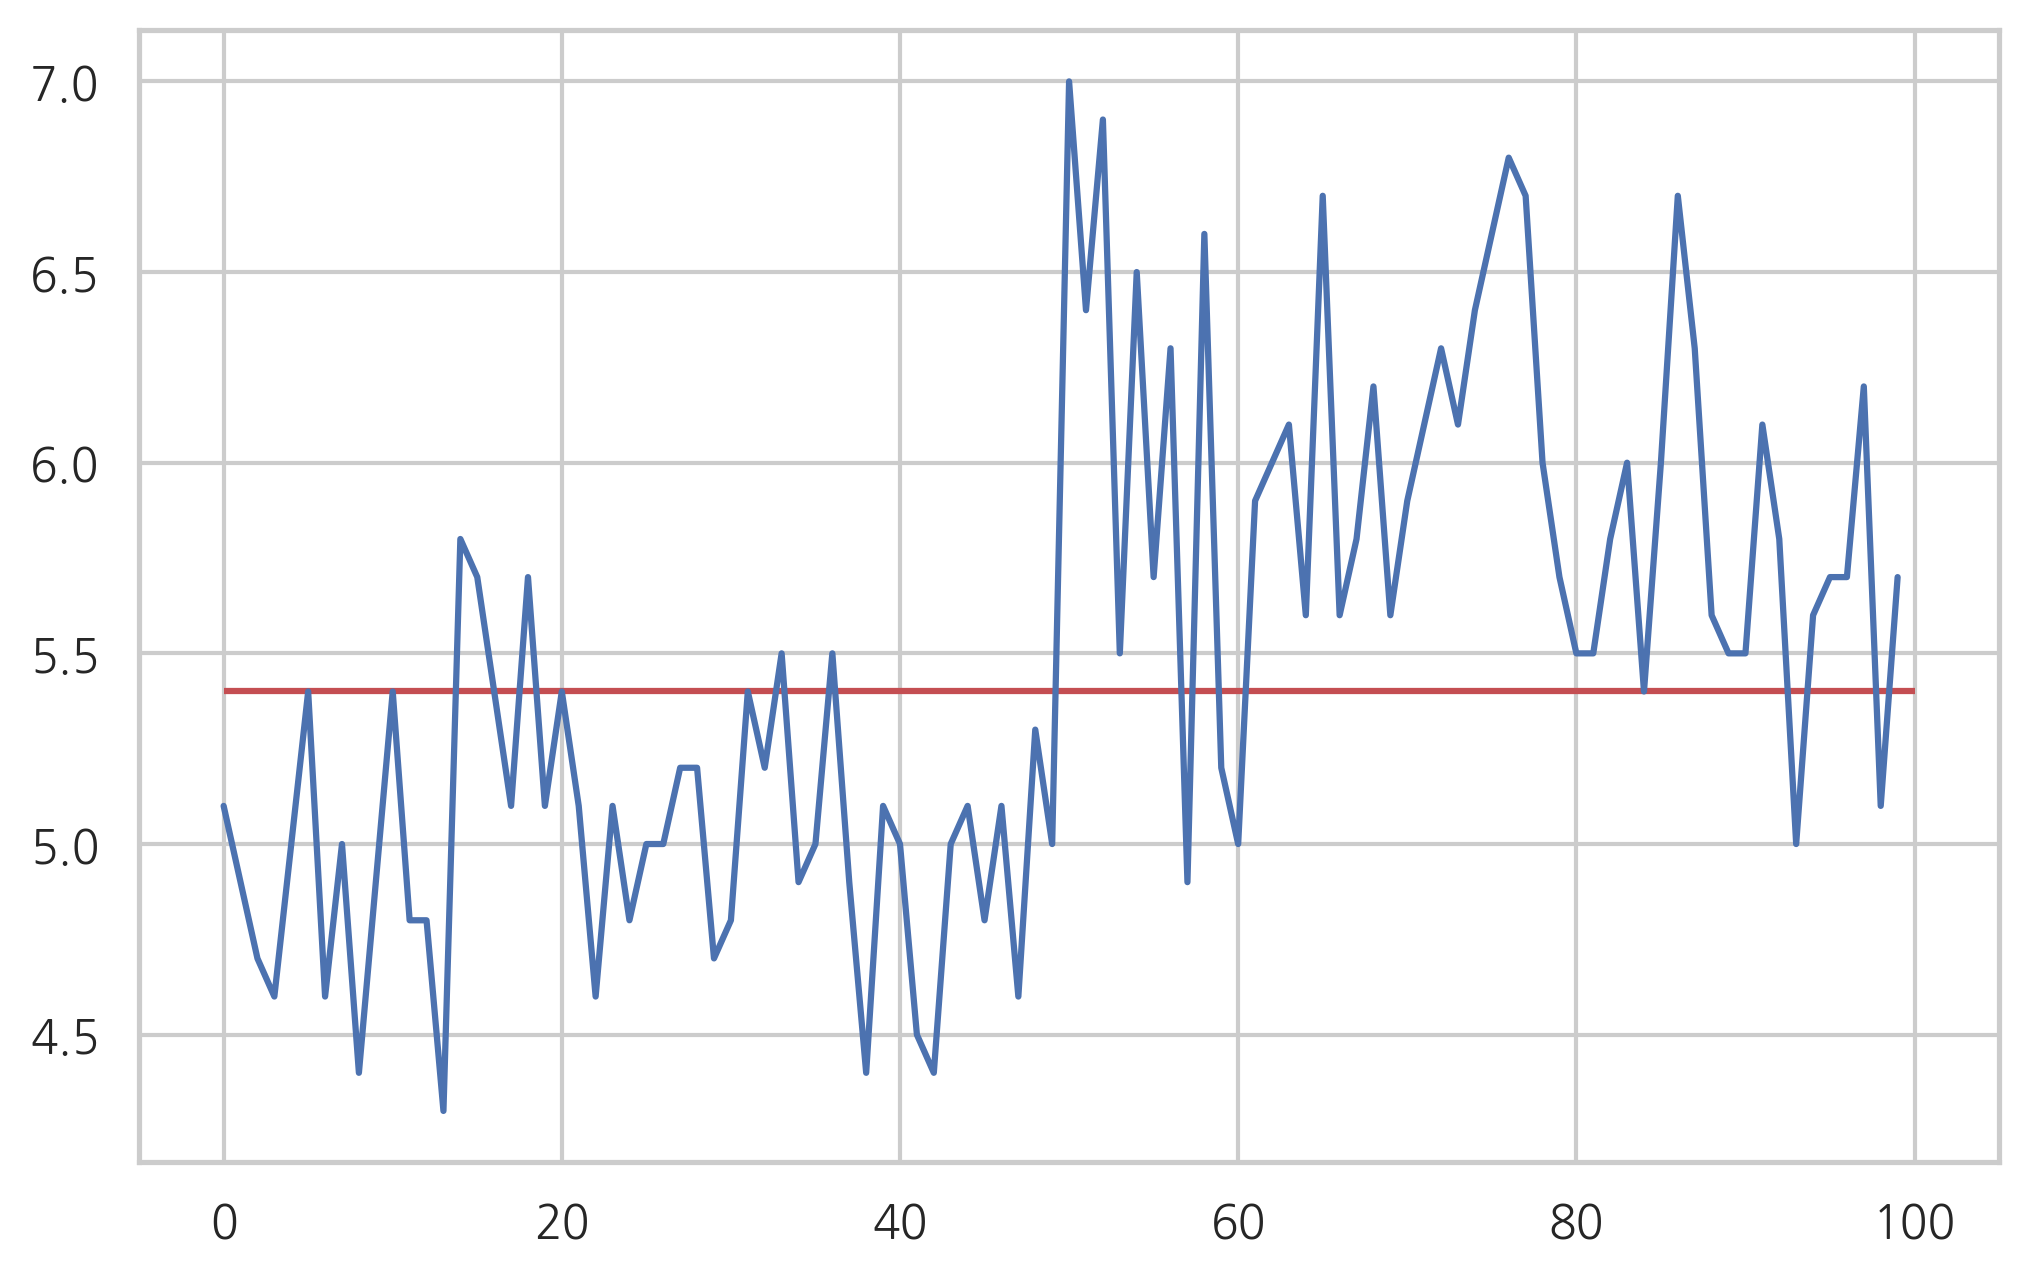

In [139]:
df['sepal length (cm)'].plot()
plt.hlines(5.4, xmin=0, xmax=100, colors='r')

In [140]:
result = np.bincount(df[df['sepal length (cm)'] < 5.4]['species'])
df_result = pd.DataFrame(result, index=['0', '1'], columns=['종류별 갯수'])
print(f'sepal length (cm) 5.4보다 작은 표본들은 대체로 전부 0번 종으로 분류됬다')
df_result

sepal length (cm) 5.4보다 작은 표본들은 대체로 전부 0번 종으로 분류됬다


,종류별 갯수
0,40
1,5


In [141]:
result = np.bincount(df[df['sepal length (cm)'] > 5.4]['species'])
df_result2 = pd.DataFrame(result, index=['0', '1'], columns=['종류별 갯수'])
print(f'sepal length (cm) 5.4보다 큰 표본들은 대체로 전부 1번종으로 분류됬다')
df_result2

sepal length (cm) 5.4보다 큰 표본들은 대체로 전부 1번종으로 분류됬다


,종류별 갯수
0,5
1,44


In [142]:
df['y_hat'] = (df['sepal length (cm)'] > 5.4).astype(int)
from sklearn.metrics import log_loss
log_loss = log_loss(df['y_hat'], df['species'])
print(f'분류모형 분류 기준이 5.4cm 넘냐 유무일 때 로그손실 : {log_loss}')

분류모형 분류 기준이 5.4cm 넘냐 유무일 때 로그손실 : 3.799313379285988


   5.5 보다 큰
0         3
1        39
----------
   5.5 보다 작은
0         45
1          6


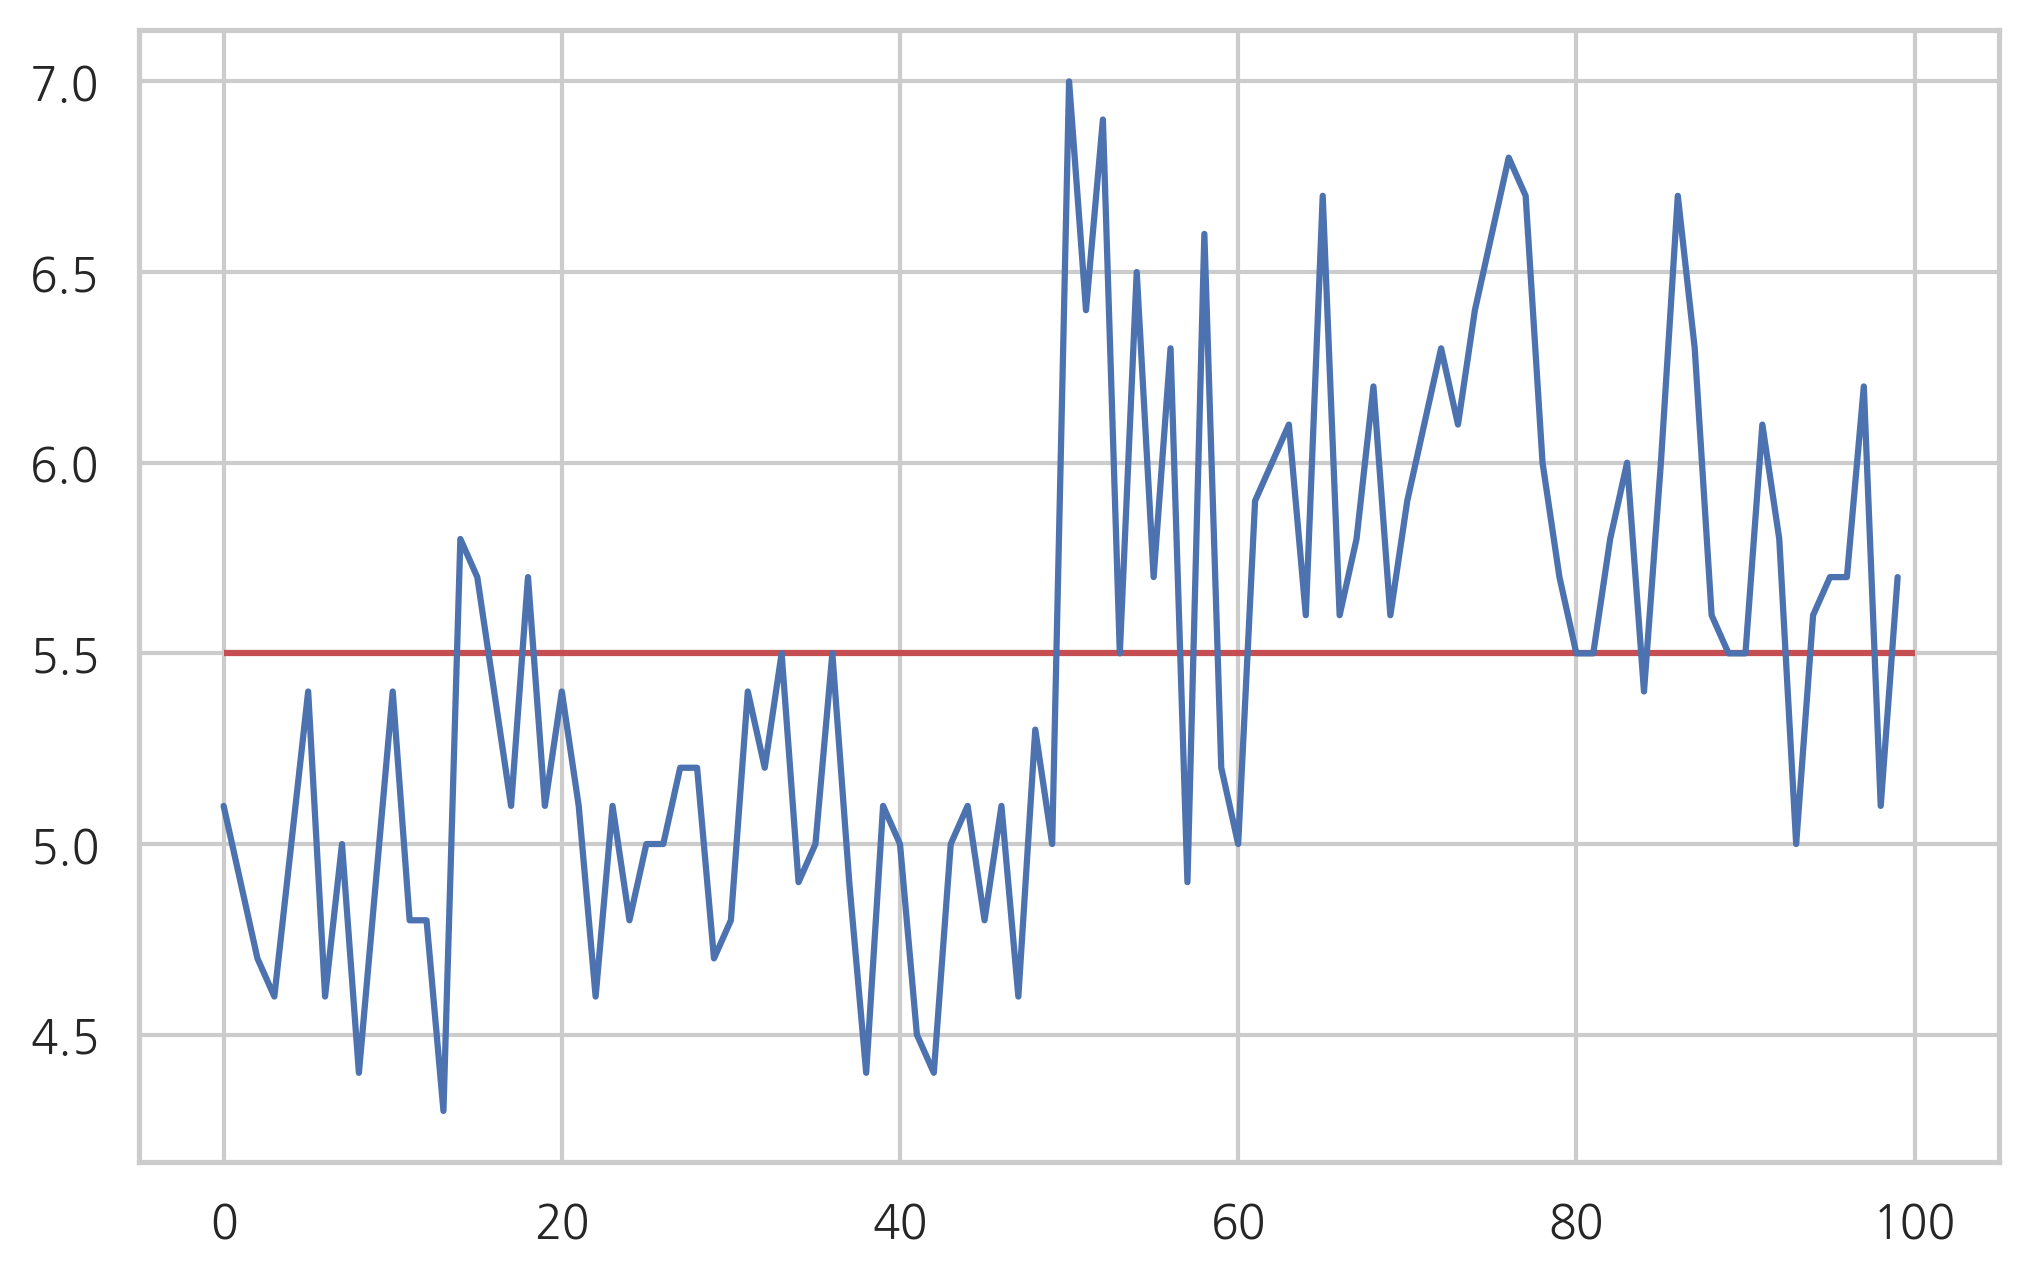

In [155]:
# 10.3.1 연습문제 
df['sepal length (cm)'].plot()
plt.hlines(5.5, xmin = 0, xmax=100, colors='r')
greater = np.bincount(df[df['sepal length (cm)'] > 5.5]['species'])
less = np.bincount(df[df['sepal length (cm)'] < 5.5]['species'])

g = pd.DataFrame(greater, columns=['5.5 보다 큰'])
l = pd.DataFrame(less, columns=['5.5 보다 작은'])
print(g)
print('-'*10)
print(l)

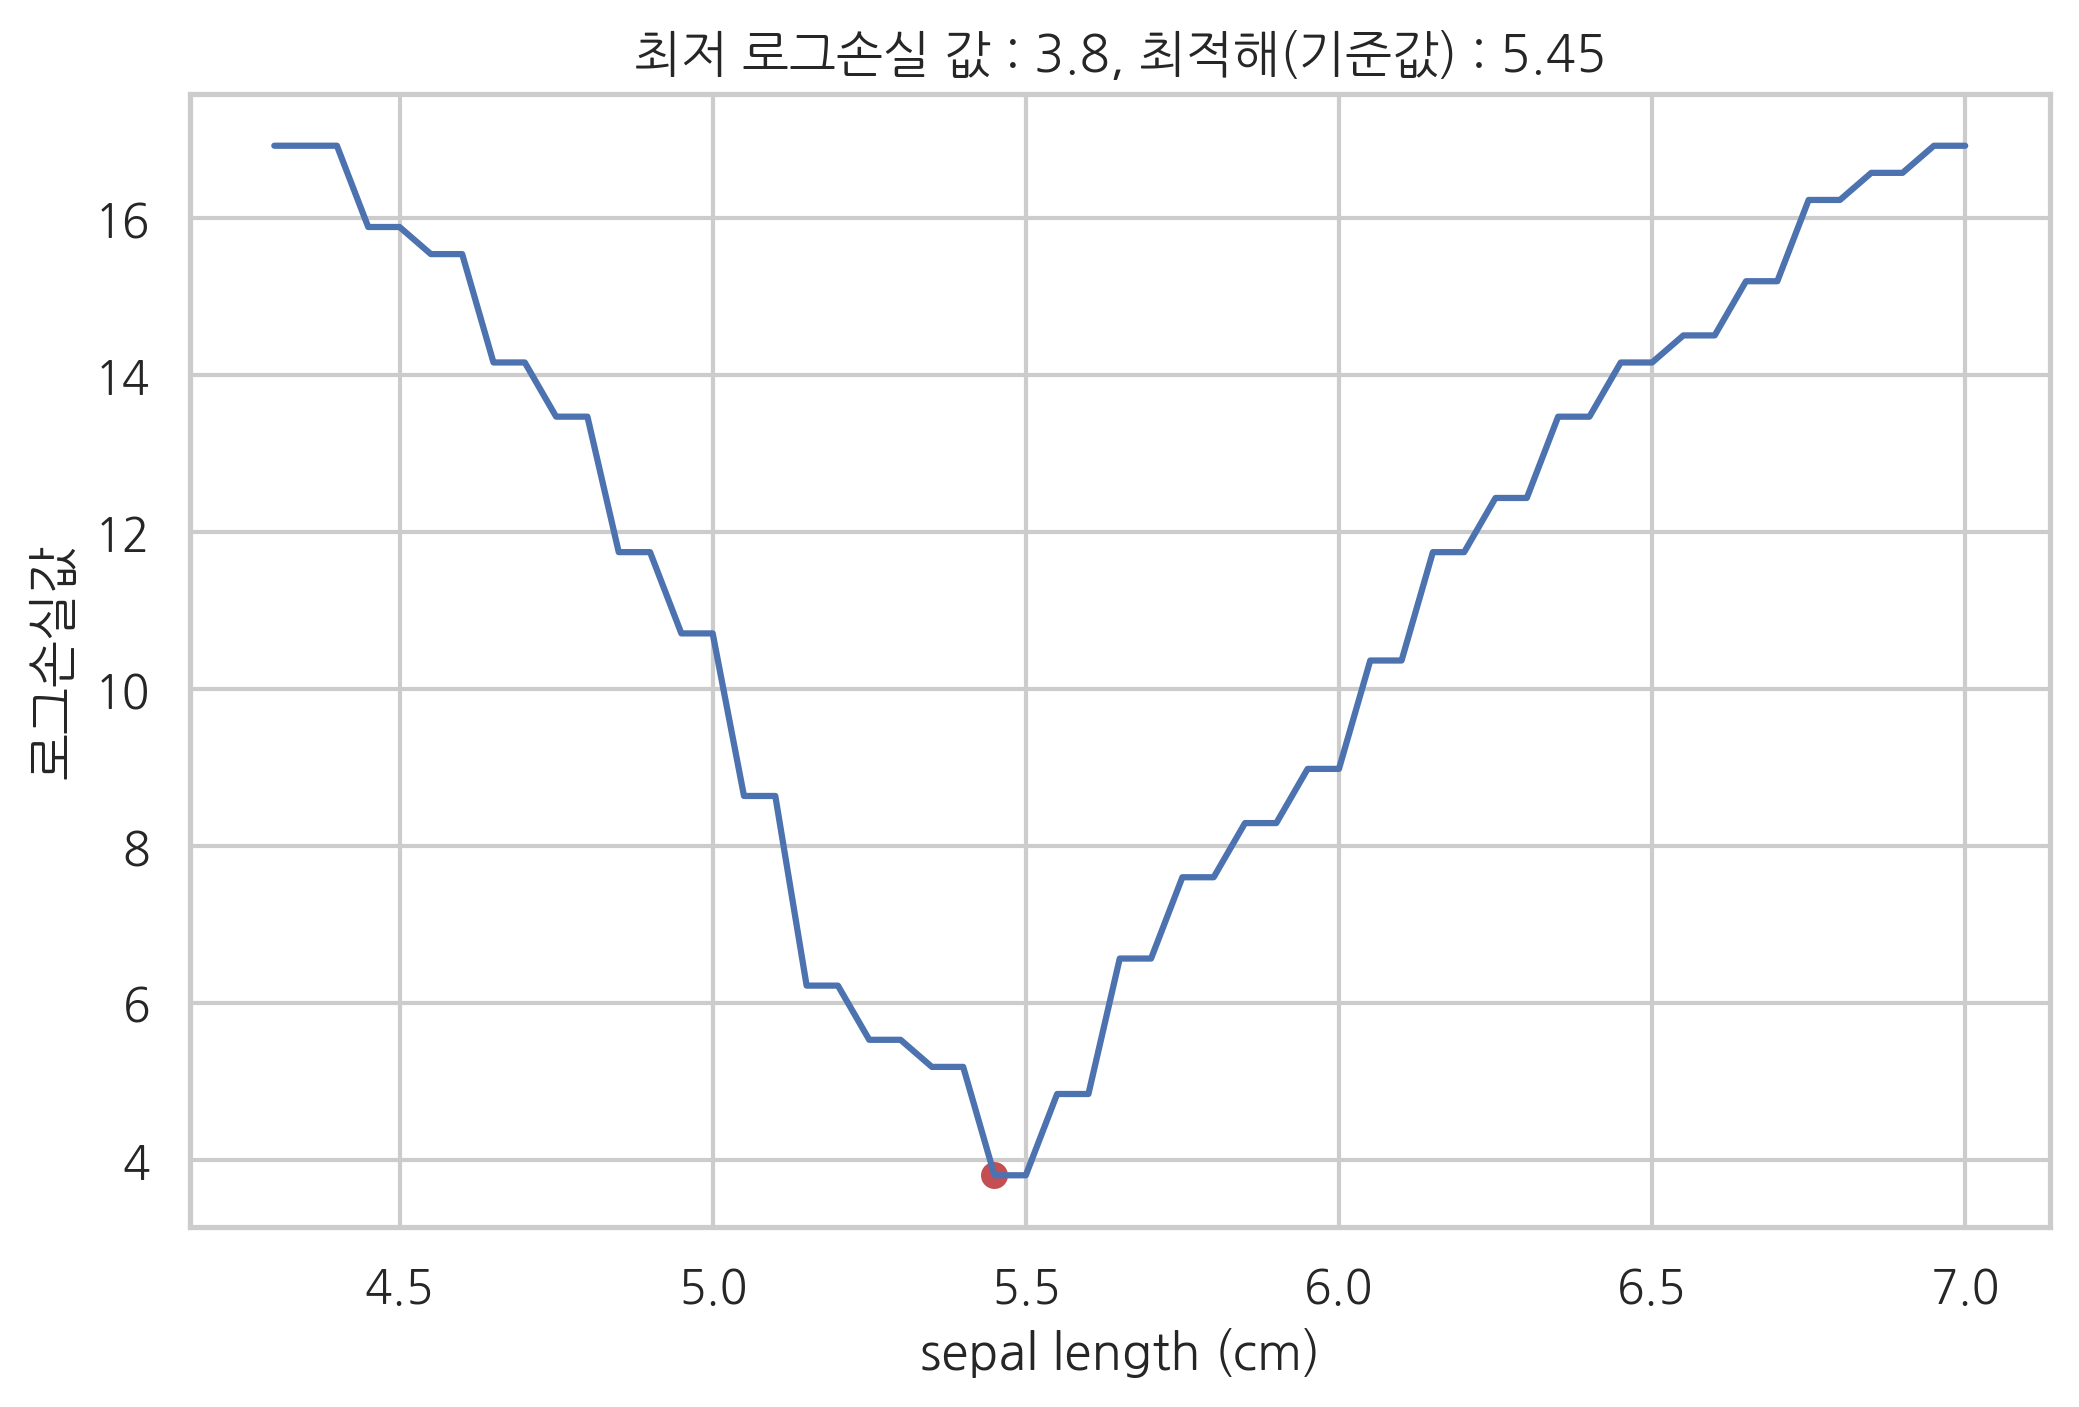

In [51]:
# 로그손실 값 그래프 그리는 함수 
def plot_log_loss(df, name, reverse=False) : 
    from sklearn.metrics import log_loss
    criteria = np.arange(np.min(df[name]), np.max(df[name])+ 0.05, 0.05)
    log_losses = []
    for x in criteria : 
        if reverse == True : 
            df['y_hat'] = (df[name] < x).astype(int)
            log_loss_value = log_loss(df['species'], df['y_hat'])
            log_losses.append(log_loss_value)
        else : 
            df['y_hat'] = (df[name] > x).astype(int)
            log_loss_value = log_loss(df['species'], df['y_hat'])
            log_losses.append(log_loss_value)
            
    plt.plot(criteria, log_losses)
    min_log_loss = np.min(log_losses) ; optimized_value = criteria[log_losses.index(min_log_loss)]
    plt.scatter(optimized_value, min_log_loss, 30, 'r')
    plt.title(f'최저 로그손실 값 : {np.round(min_log_loss, 2)}, 최적해(기준값) : {np.round(optimized_value, 2)}')
    plt.xlabel(name)
    plt.ylabel('로그손실값')
    plt.show()

plot_log_loss(df, 'sepal length (cm)')

Text(80, 2.3, '대체로 1')

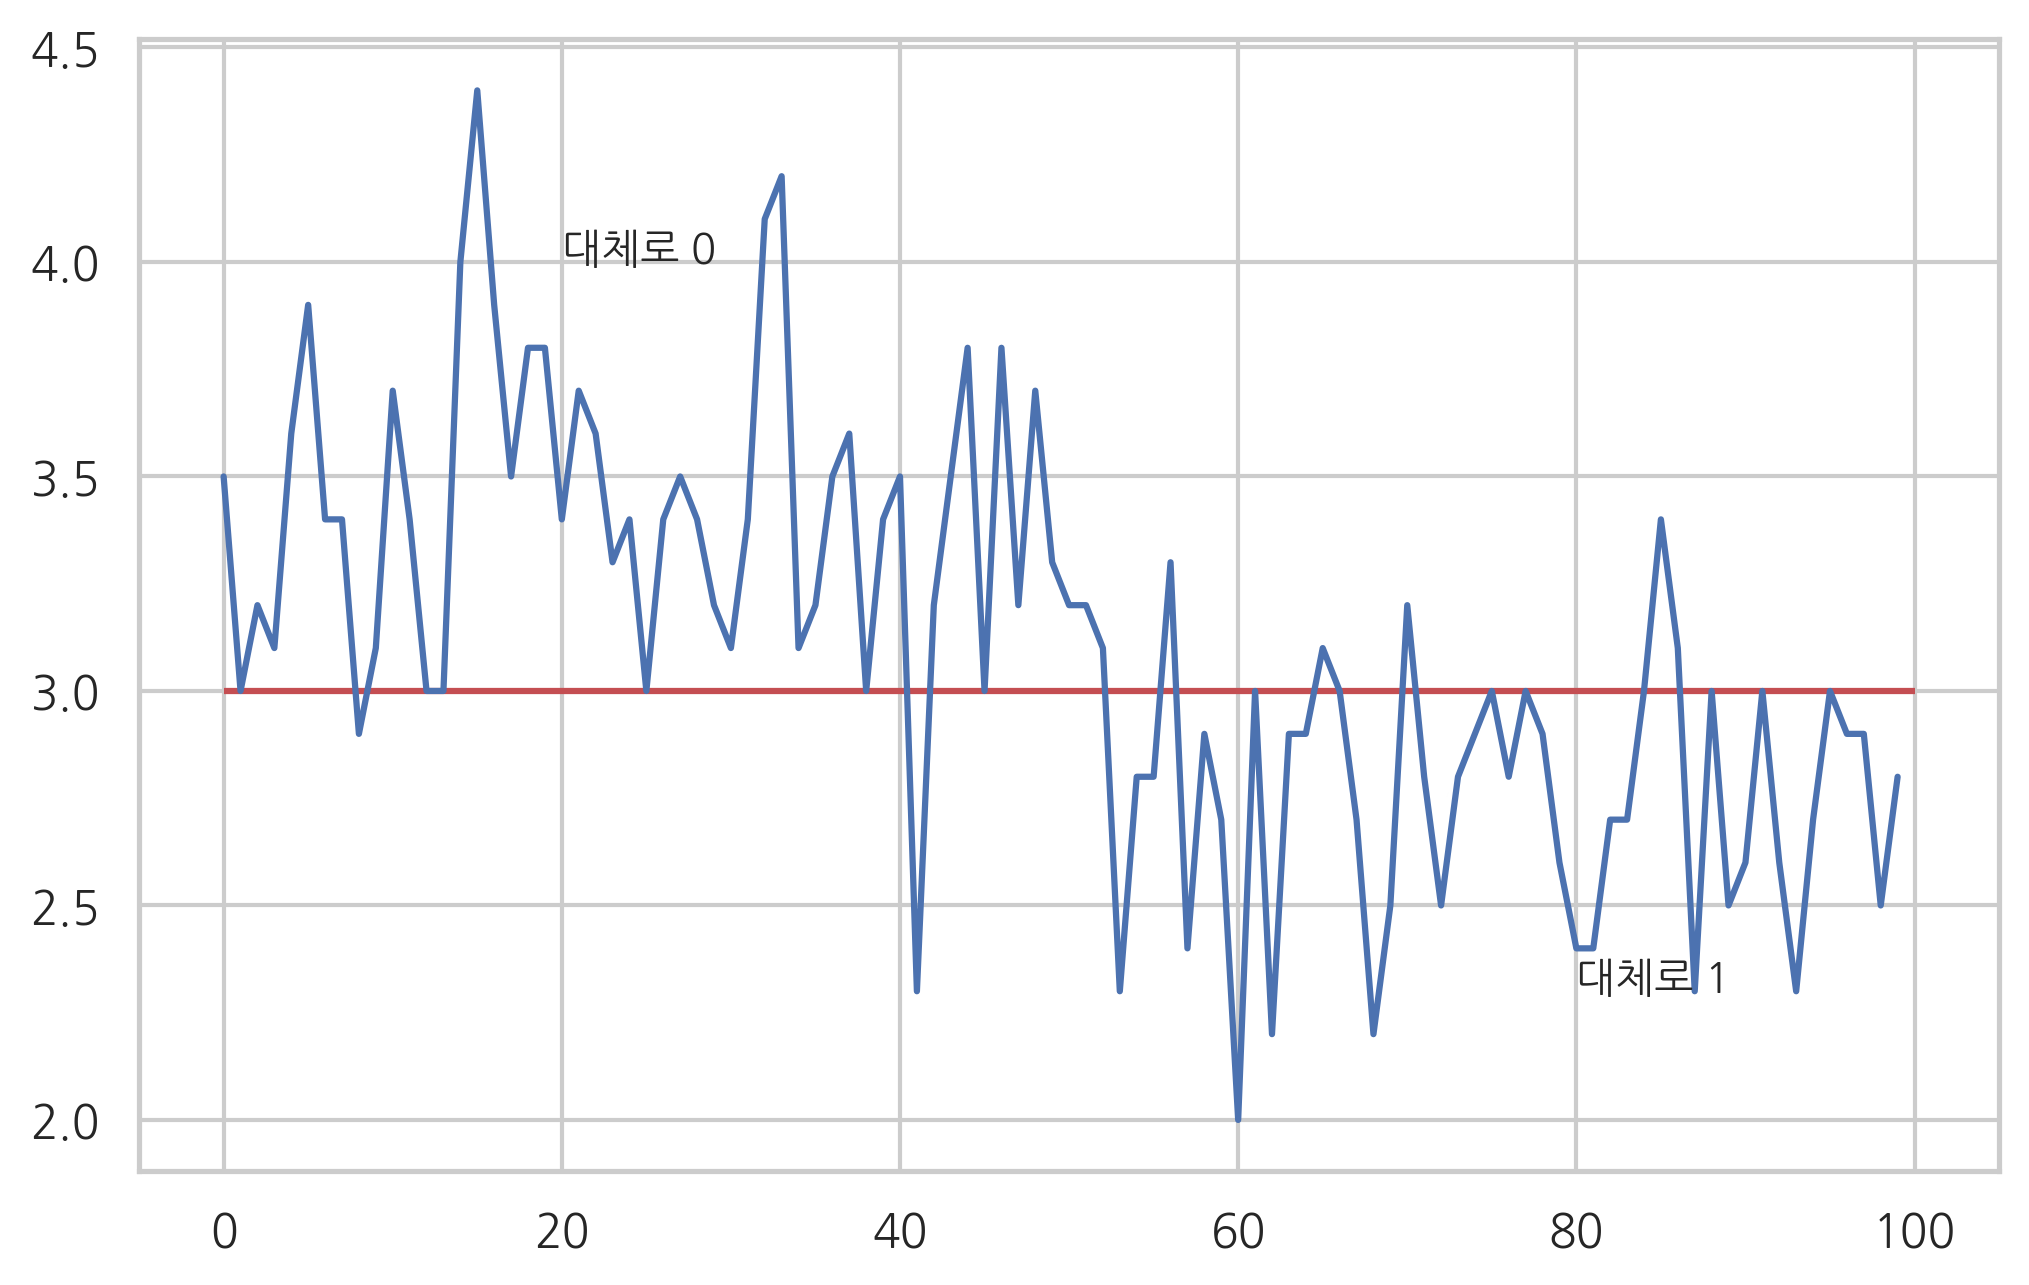

In [33]:
# 2. 
df['sepal width (cm)'].plot()
plt.hlines(3.0, xmin = 0 , xmax=100, colors='r')
np.bincount(df[df['sepal width (cm)'] > 3]['species']) # 대체로 0
np.bincount(df[df['sepal width (cm)'] < 3]['species']) # 대체로 1
plt.text(20, 4.0, '대체로 0')
plt.text(80, 2.3, '대체로 1')

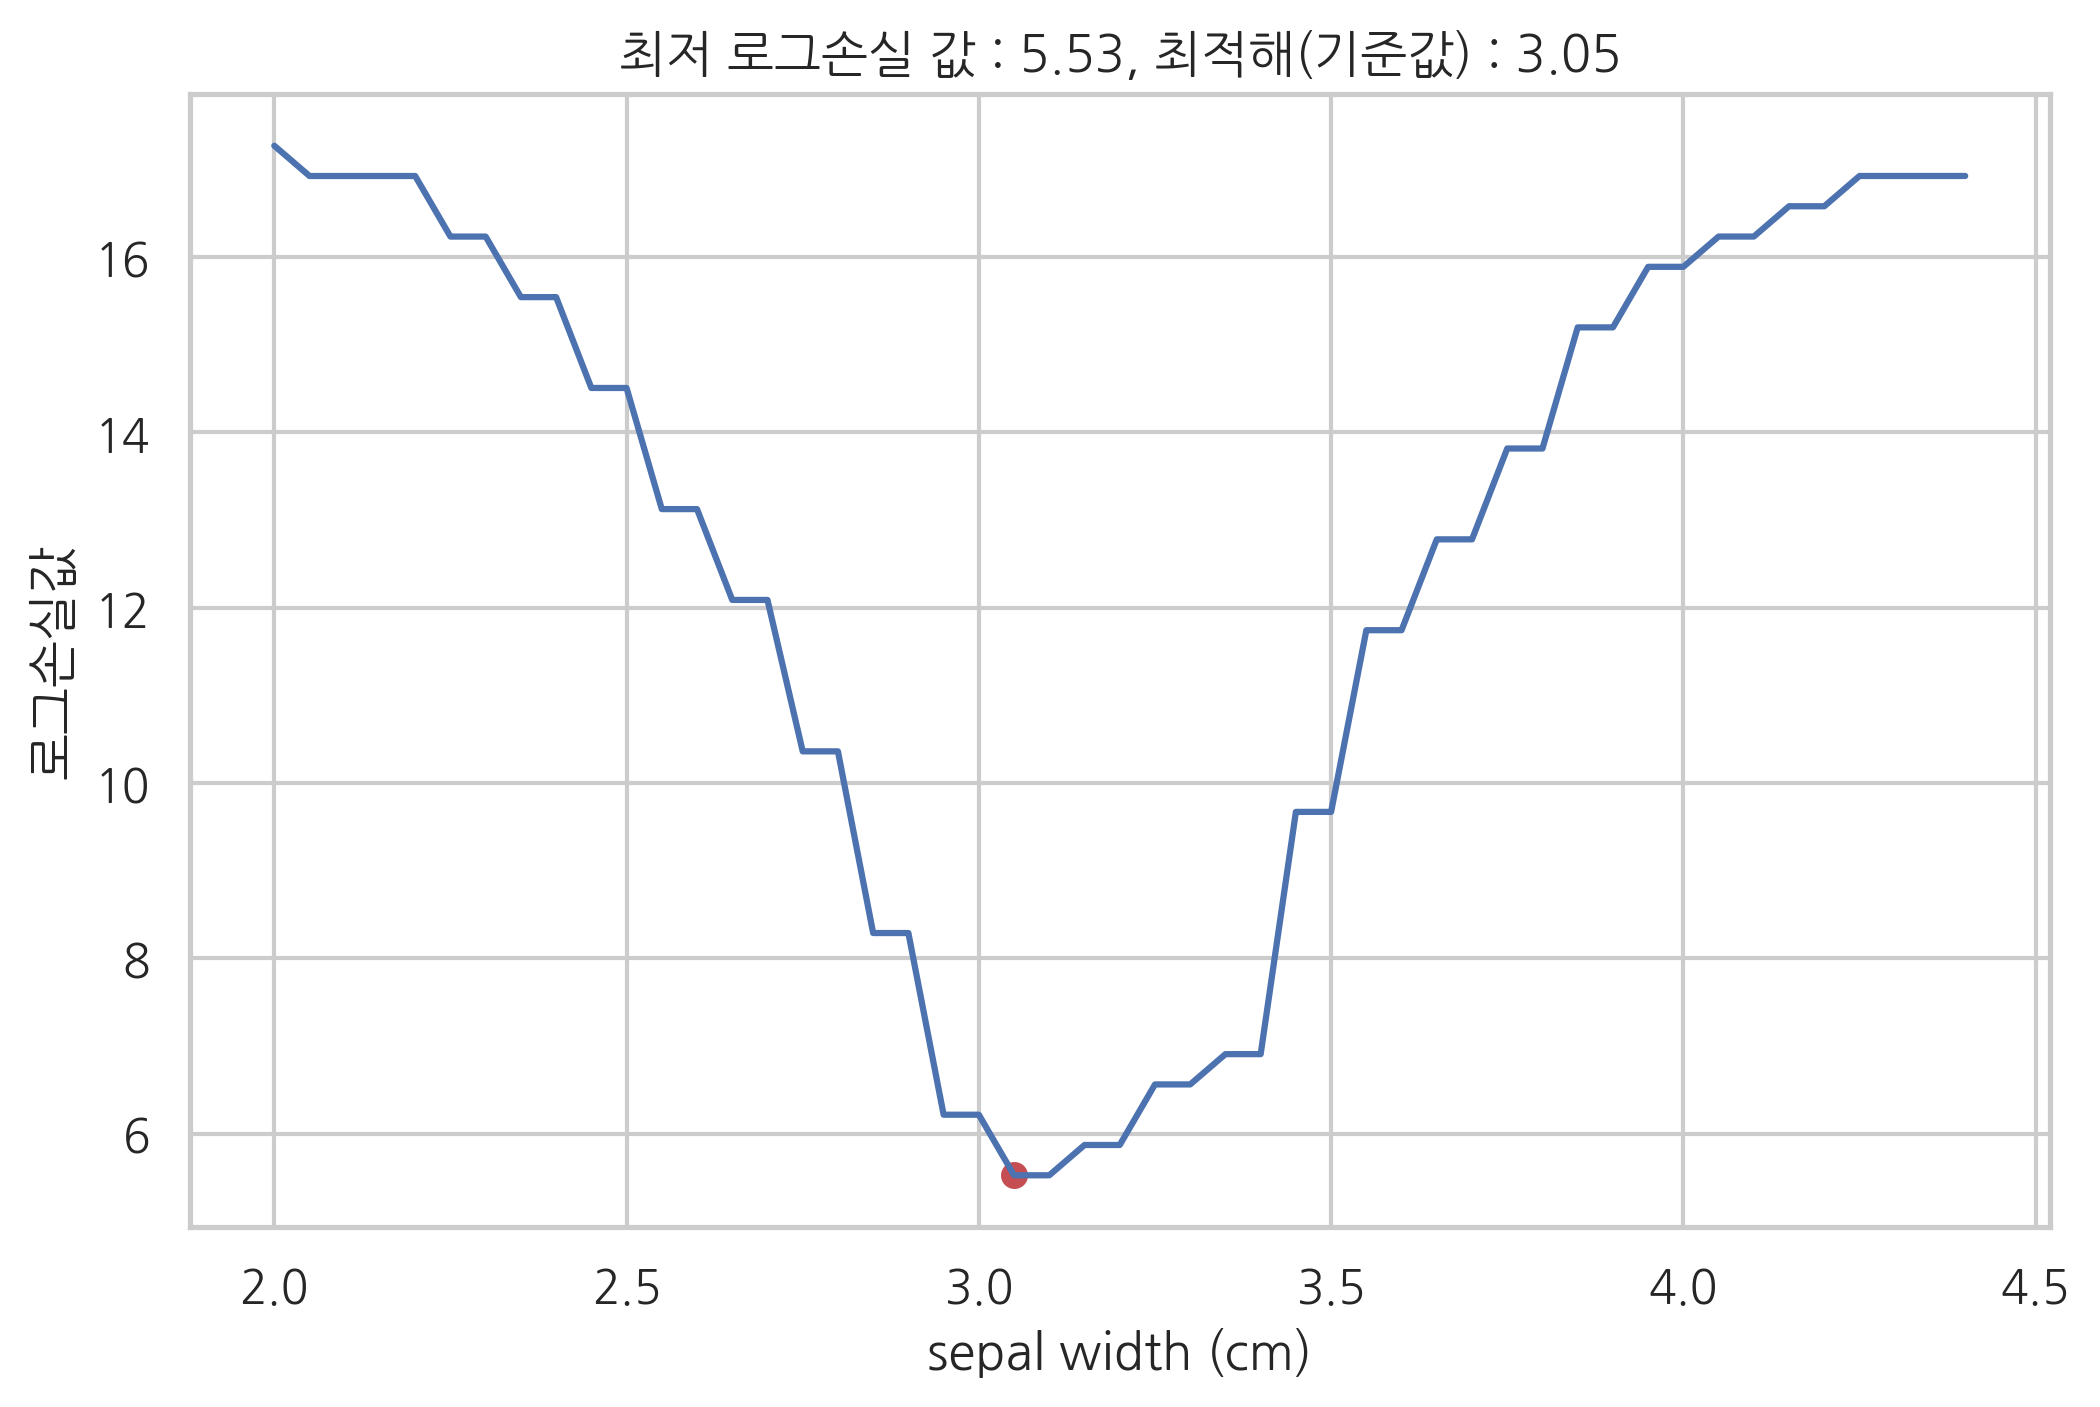

In [54]:
plot_log_loss(df, 'sepal width (cm)', reverse=True)

# 최저 로그손실값이 'sepal length (cm)' 가 더 작다. 
# = 'sepal length (cm)'를 기준값으로 썼을 때, 이진분류모형 분류성능이 더 뛰어나다. 
# 따라서 꽃받침 길이가 분류모형 성능 극대화에 더 적합한 특징값이다. 

# 쿨백-라이블러 발산

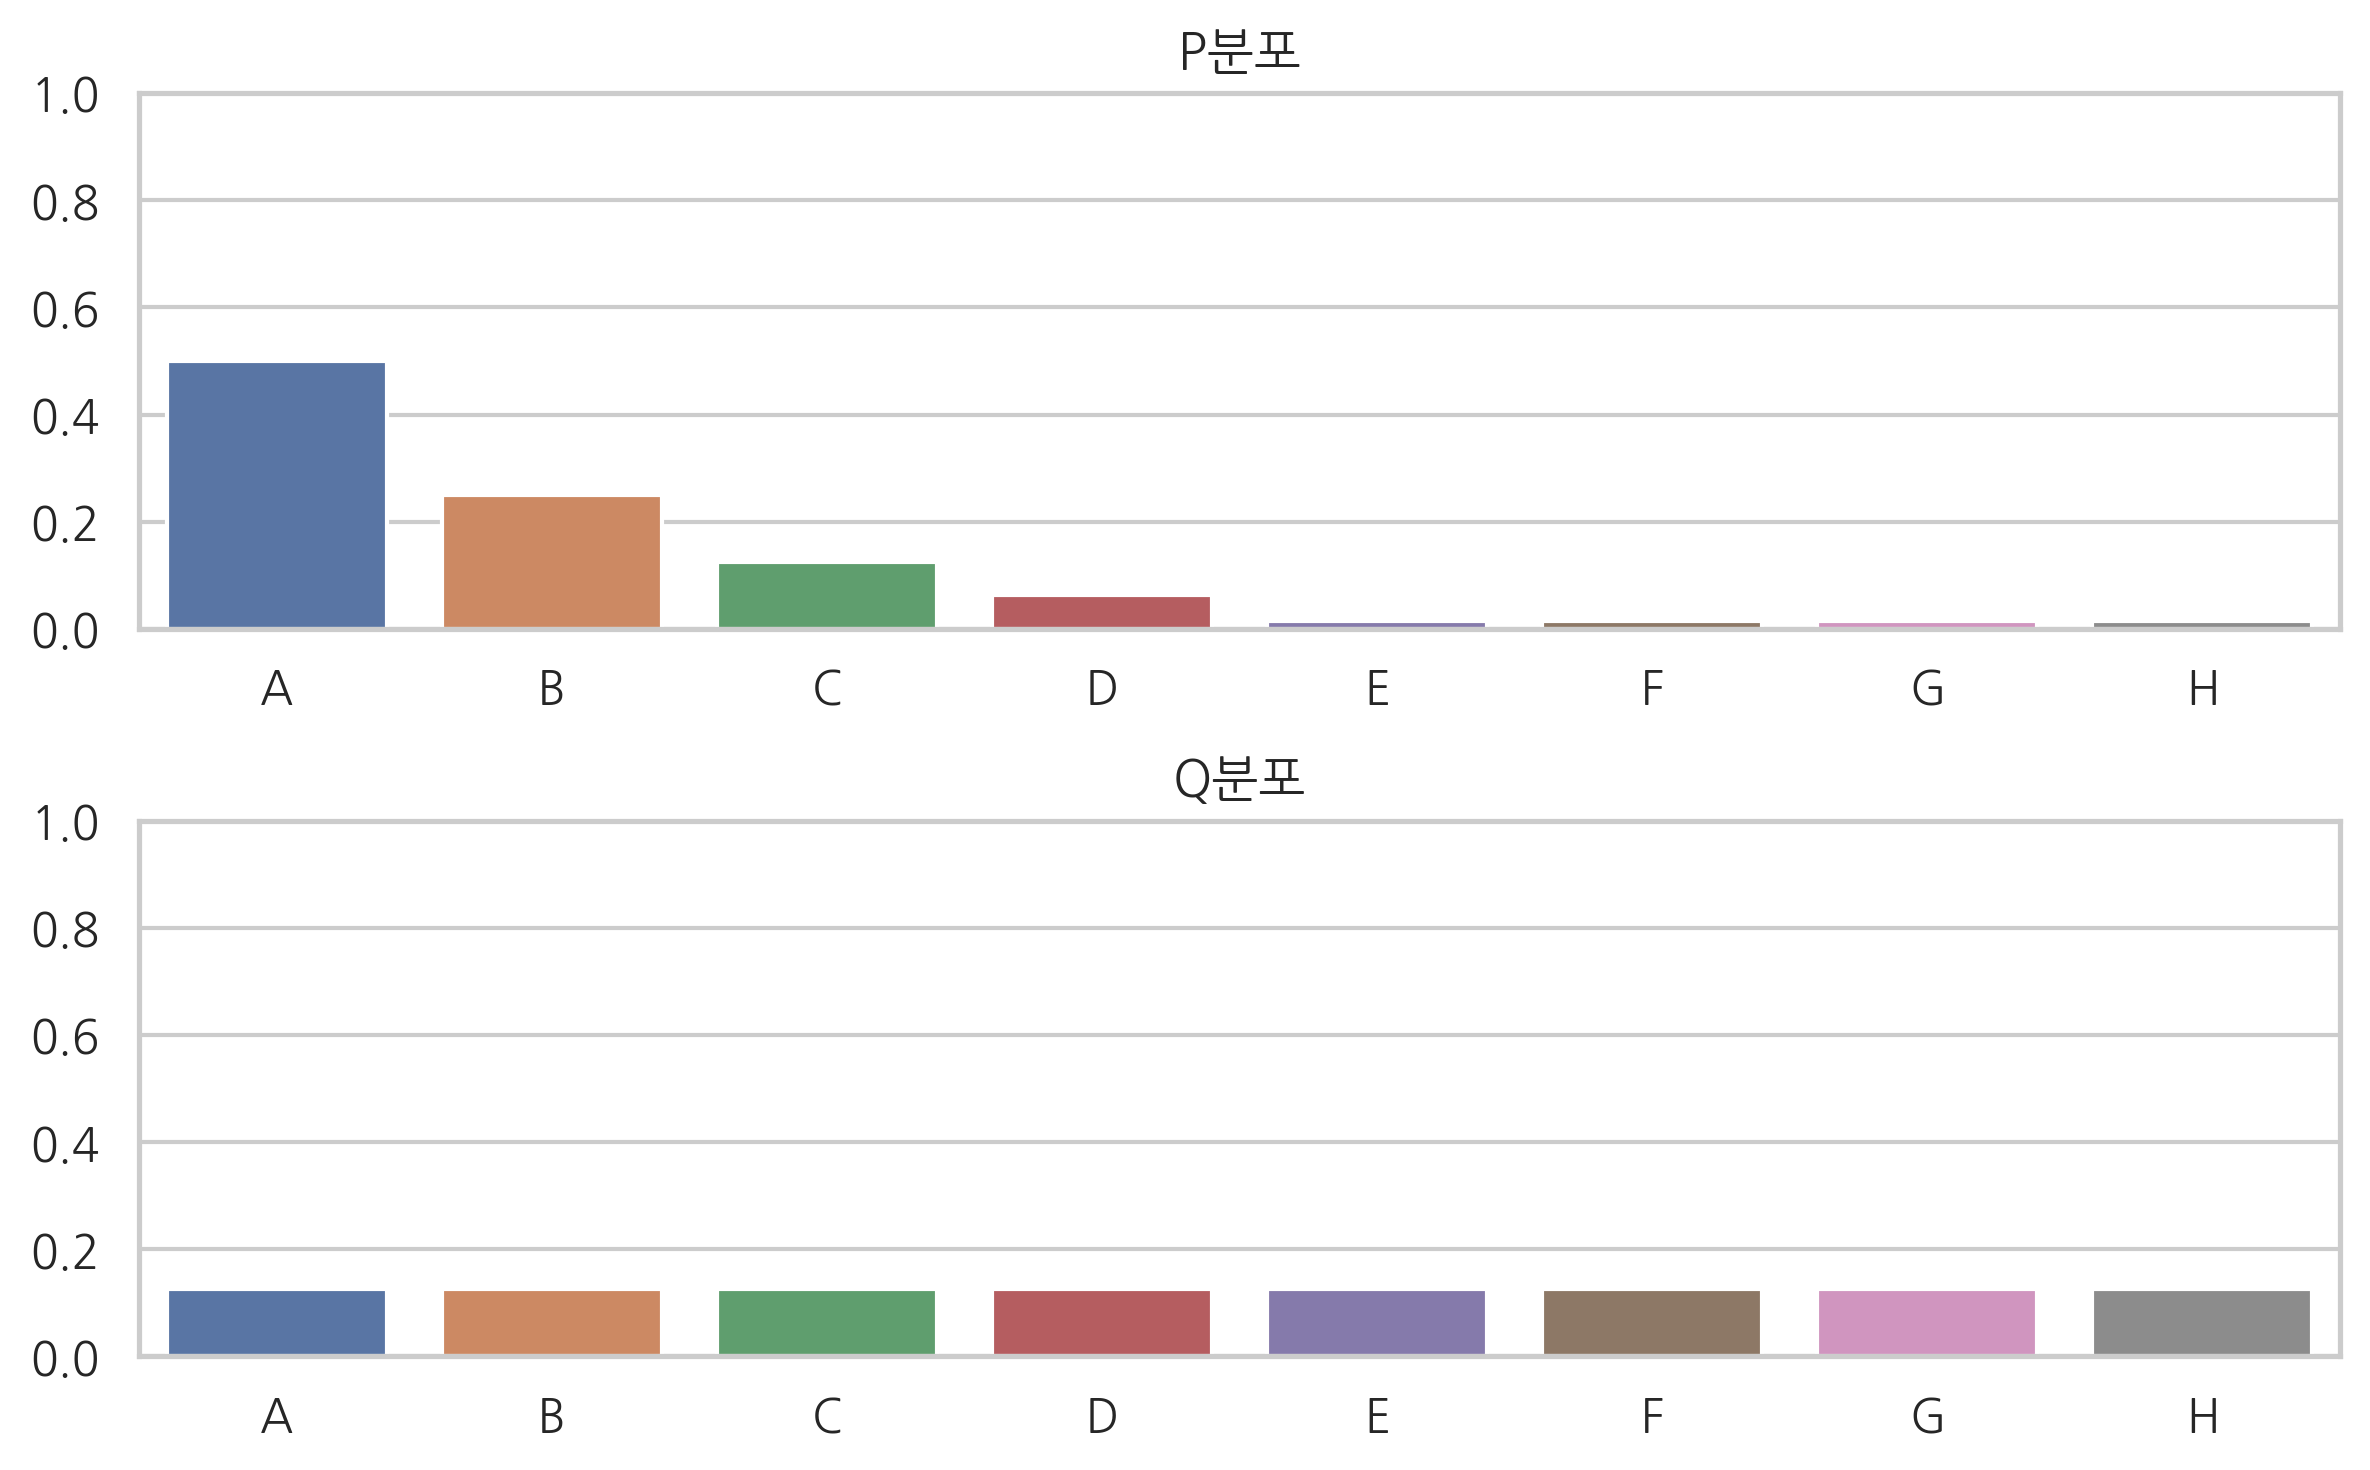

In [88]:
# 10.3.2 연습문제 
p = [1/2, 1/4, 1/8, 1/16] + [1/64]*4
q = [1/8]*8

plt.subplot(211)
sns.barplot(np.arange(1,9), p)
plt.title('P분포')
plt.ylim(0,1)
plt.xticks(np.arange(0,8), ['A', 'B', 'C', 'D', 'E', 'F','G', 'H'])

plt.subplot(212)
sns.barplot(np.arange(1,9), q)
plt.title('Q분포')
plt.ylim(0,1)
plt.xticks(np.arange(0,8), ['A', 'B', 'C', 'D', 'E', 'F','G', 'H'])

plt.tight_layout()
plt.show()

In [91]:
# 1. 
KL = sp.stats.entropy(p, q, base=2)
print(f'쿨백-라이블러발산값 : {KL}')
print(f'Q, P 두 분포 모양이 다른 정도')

쿨백-라이블러발산값 : 1.0
Q, P 두 분포 모양이 다른 정도


In [94]:
# 2. 
result = calc_cross_entropy(p,q) - sp.stats.entropy(p, base=2)
print(f'고정길이 인코딩 글자 수 - 가변길이 인코딩 글자 수 : {result}')
print(f'= 쿨백-라이블러 발산값')

고정길이 인코딩 글자 수 - 가변길이 인코딩 글자 수 : 1.0
= 쿨백-라이블러 발산값


In [99]:
print(calc_cross_entropy(p,q))
print(sp.stats.entropy(p, base=2))
print('-'*100)
print(result)

3.0
2.0
----------------------------------------------------------------------------------------------------
1.0


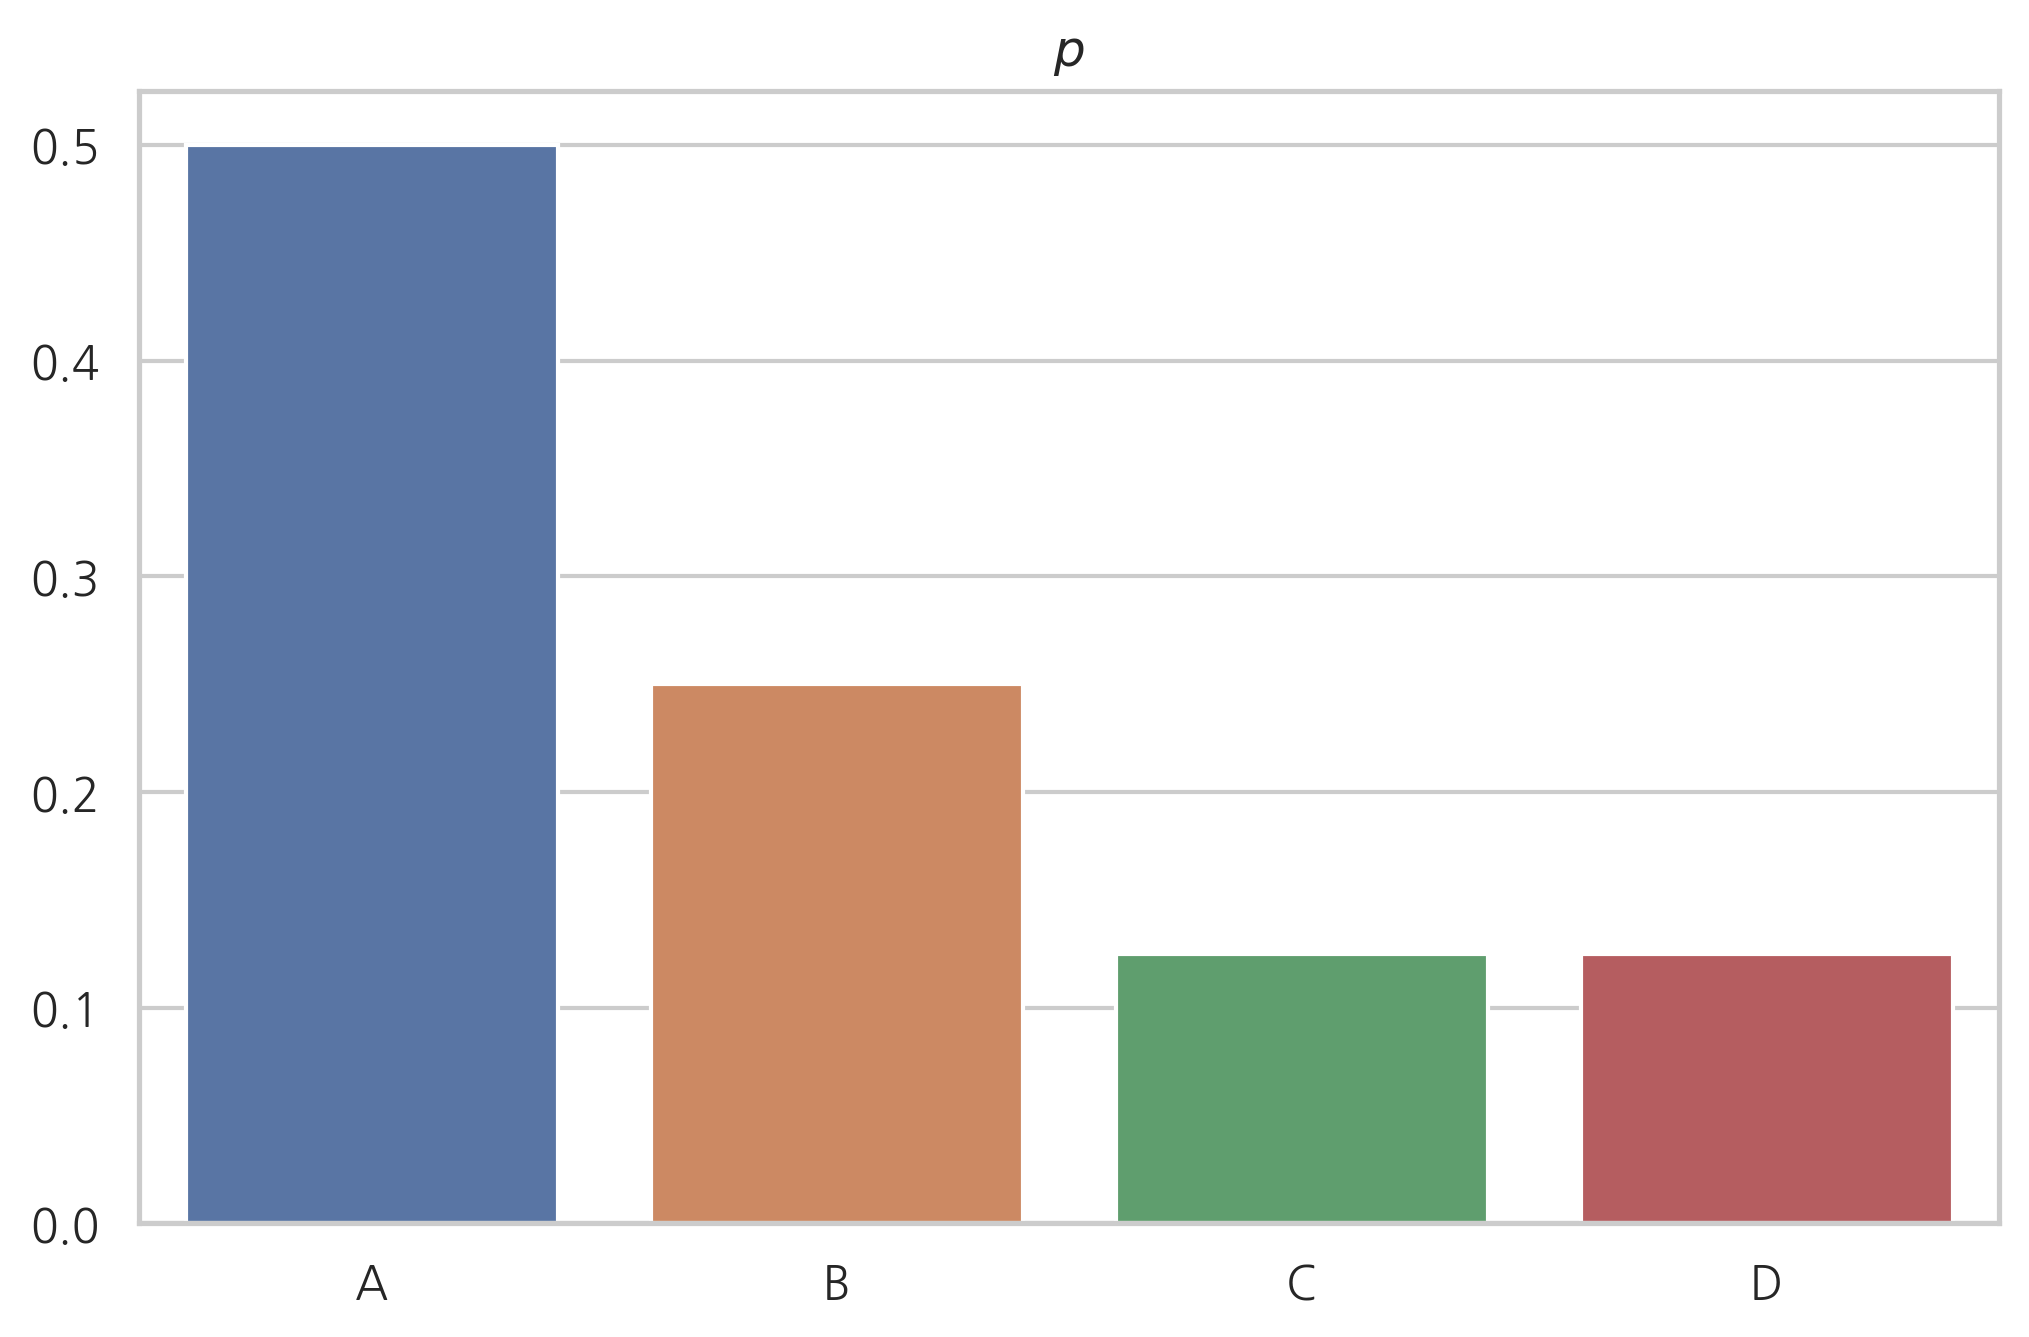

In [104]:
p = [0.5, 0.25, 0.125, 0.125]
sns.barplot([1,2,3,4], p)
plt.xticks([0,1,2,3], ['A', 'B', 'C', 'D'])
plt.title('$p$')
plt.show()